In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import os
from collections import Counter

In [2]:
def plot_ecg(signals,fields, annotation):
    t = np.arange(fields["sig_len"])/fields["fs"]
    plt.figure(figsize=(15,6))
    plt.plot(t,signals[:,0] + 1)
    plt.plot(t,signals[:,1] - 1)
    
    labels = annotation.symbol
    length = annotation.ann_len
    locs = annotation.sample/fields["fs"] # sample locations
    for i in range(length):
        plt.annotate(labels[i],(locs[i],0))
    
    plt.legend(fields["sig_name"])
    plt.xlabel("seconds"); plt.ylabel(fields["units"][0])
    plt.title("Fs:" + str(fields["fs"]) + " Samples:" + str(fields["sig_len"]) 
                           + " Channels:" + str(fields["n_sig"]))
    plt.grid()
    plt.show()
    print(fields["comments"])
    
def plot_unique(signals,fields,labels,locs,delta=150):
    unique, unique_idx = np.unique(labels, return_index=True)

    for idx in unique_idx:
        delta = 150
        plt.plot(signals[locs[idx]-delta:locs[idx]+delta,0] + 1)
        plt.plot(signals[locs[idx]-delta:locs[idx]+delta,1] - 1)
        plt.title(labels[idx] + ":" + labels_dict[labels[idx]])
        plt.legend(fields["sig_name"])
        plt.grid()
        plt.show()

In [3]:
n_list = []

for file in os.listdir("data"):
    if file.endswith(".dat"):
        n_list.append(int(os.path.splitext(file)[0]))

n_list = np.sort(n_list)
print(n_list)

[100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 200 201 202 203 205 207 208 209 210 212 213 214 215
 217 219 220 221 222 223 228 230 231 232 233 234]


In [4]:
labels_dict = {
'N': "Normal",
'A': "Atrial premature beat",
'V': "Premature ventricular contraction",
'Q': "Unclassifiable beat",
'f': "Fusion of paced and normal beat",
'J': "Nodal (junctional) premature beat",
'j': "Nodal (junctional) escape beat",
'F': "Fusion of ventricular and normal beat",
'a': "Aberrated atrial premature beat",
'e': "Atrial escape beat",
'L': "Left bundle branch block beat",
'R': "Right bundle branch block beat",
'E': "Ventricular escape beat",
'S': "Supraventricular premature or ectopic beat (atrial or nodal)",

'+': "Rhythm change",
'|': "Isolated QRS-like artifact",
'/': "Paced beat",
'~': "Change in signal quality",
'"': "Comment annotation",
'x': "Non-conducted P-wave (blocked APC)",
'[': "Start of ventricular flutter/fibrillation",
'!': "Ventricular flutter wave",
']': "End of ventricular flutter/fibrillation"
}

100
Length: 2274 2274
['MLII', 'V5']
dict_keys(['+', 'N', 'A', 'V'])
dict_values([1, 2239, 33, 1])
Avg annotation rate:  1.2594461538461539


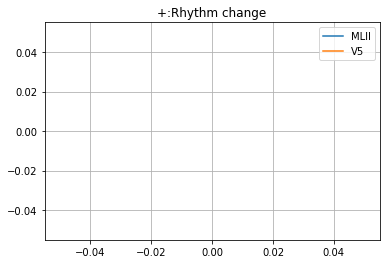

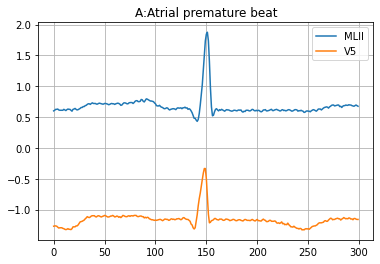

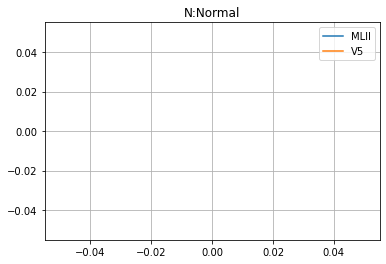

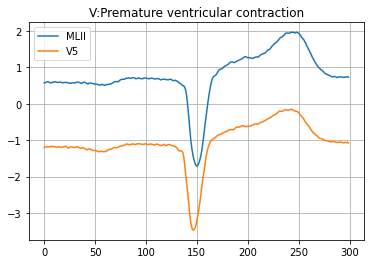

101
Length: 1874 1874
['MLII', 'V1']
dict_keys(['+', 'N', '~', '|', 'Q', 'A'])
dict_values([1, 1860, 4, 4, 2, 3])
Avg annotation rate:  1.0379076923076922


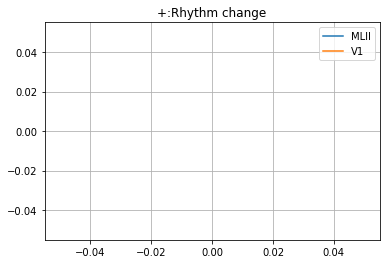

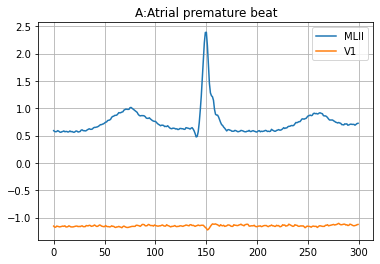

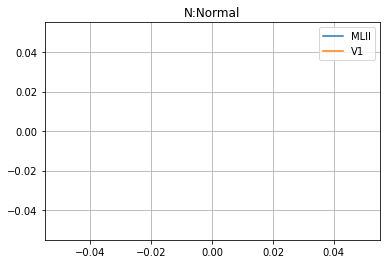

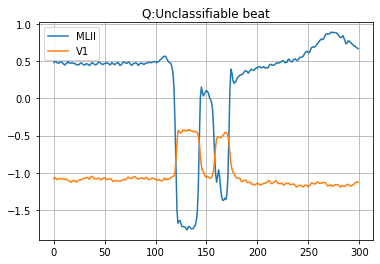

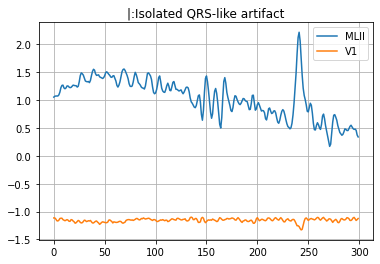

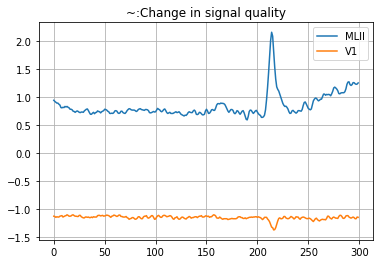

102
Length: 2192 2192
['V5', 'V2']
dict_keys(['+', '/', 'f', 'N', 'V'])
dict_values([5, 2028, 56, 99, 4])
Avg annotation rate:  1.2140307692307692


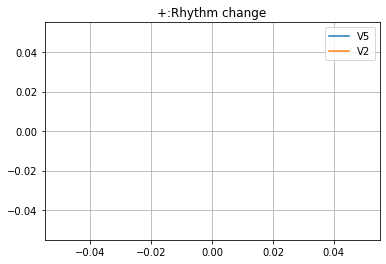

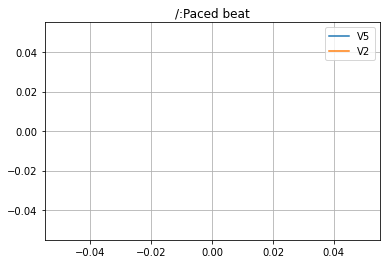

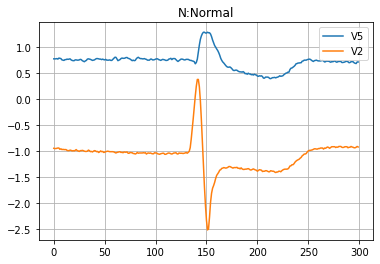

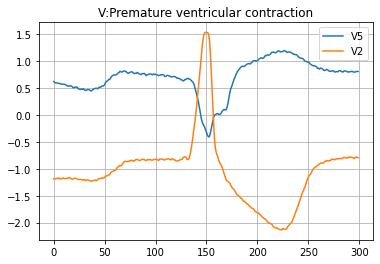

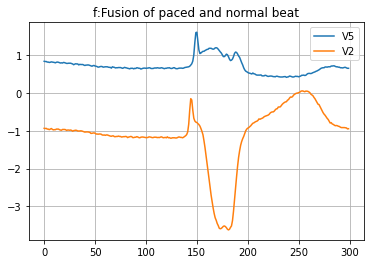

103
Length: 2091 2091
['MLII', 'V2']
dict_keys(['+', 'N', '~', 'A'])
dict_values([1, 2082, 6, 2])
Avg annotation rate:  1.1580923076923075


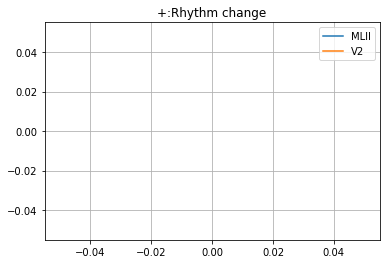

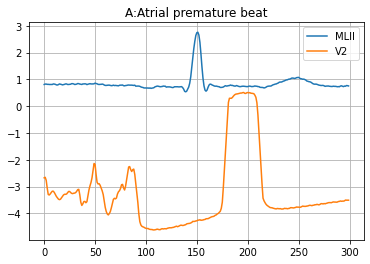

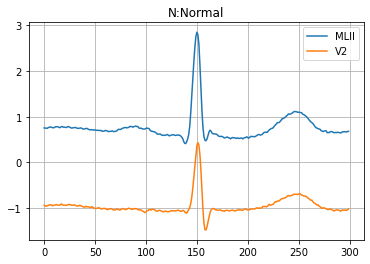

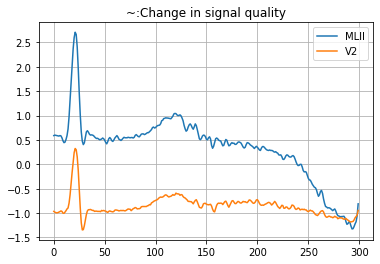

104
Length: 2311 2311
['V5', 'V2']
dict_keys(['+', '/', 'f', '~', 'Q', 'N', 'V'])
dict_values([45, 1380, 666, 37, 18, 163, 2])
Avg annotation rate:  1.2799384615384615


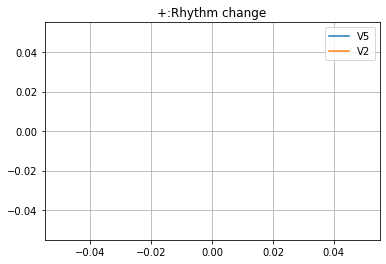

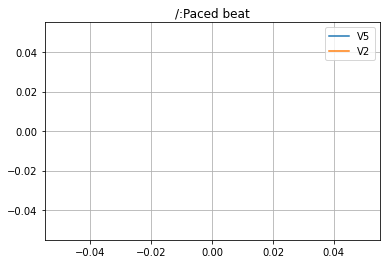

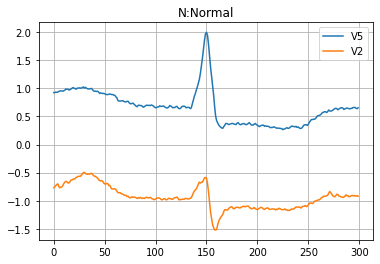

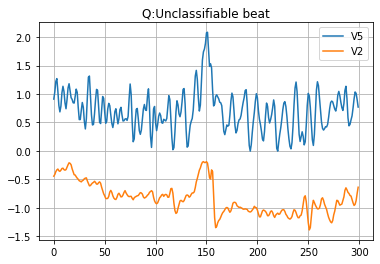

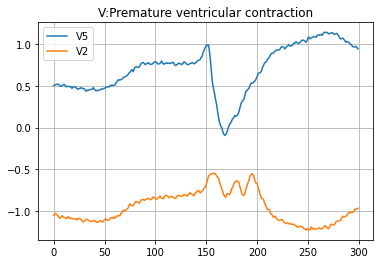

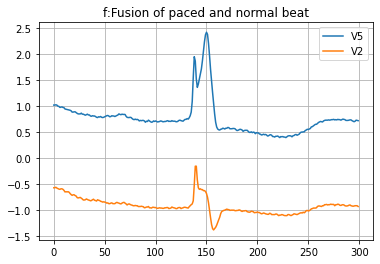

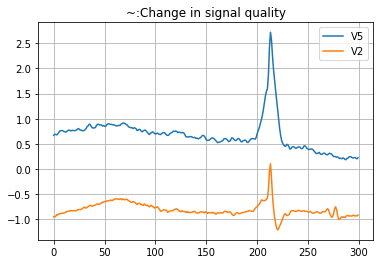

105
Length: 2691 2691
['MLII', 'V1']
dict_keys(['+', 'N', 'V', '~', '|', 'Q'])
dict_values([1, 2526, 41, 88, 30, 5])
Avg annotation rate:  1.4904


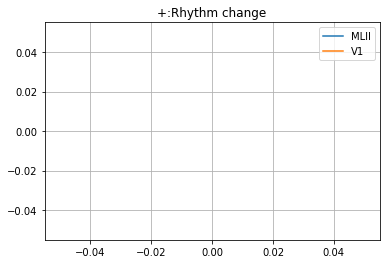

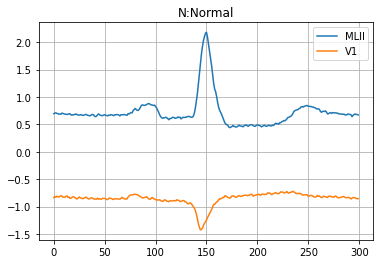

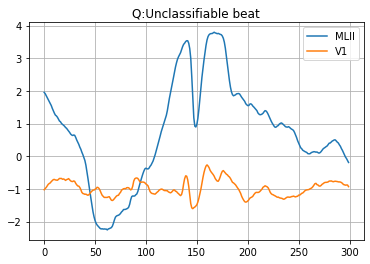

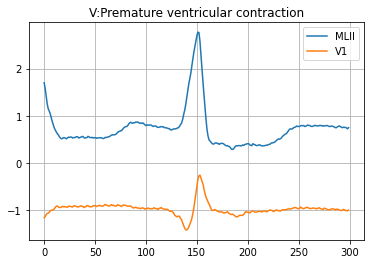

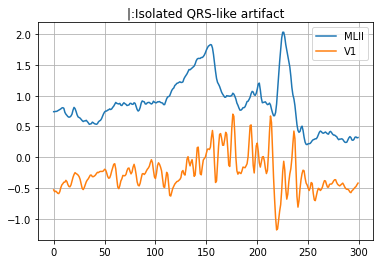

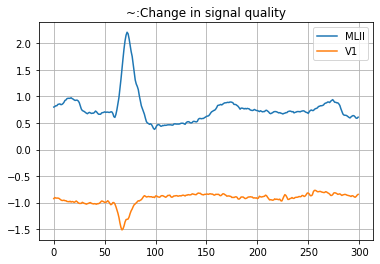

106
Length: 2098 2098
['MLII', 'V1']
dict_keys(['~', '+', 'N', 'V'])
dict_values([30, 41, 1507, 520])
Avg annotation rate:  1.1619692307692306


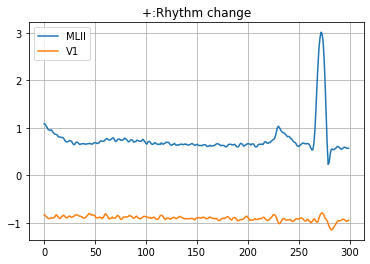

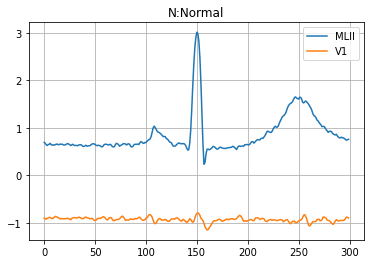

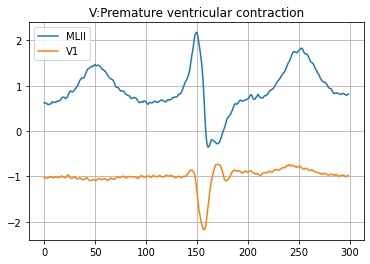

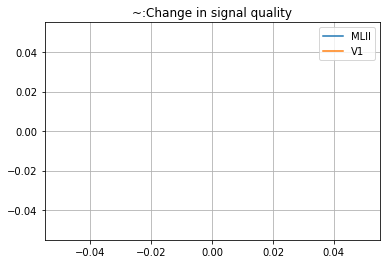

107
Length: 2140 2140
['MLII', 'V1']
dict_keys(['+', '/', 'V', '~'])
dict_values([1, 2078, 59, 2])
Avg annotation rate:  1.185230769230769


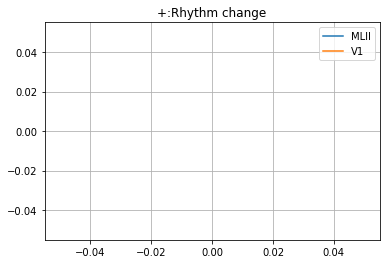

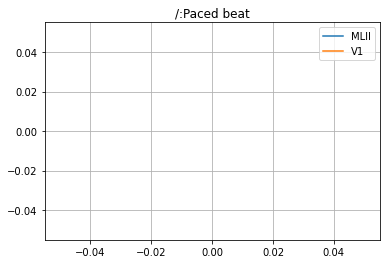

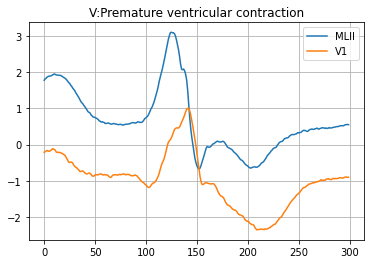

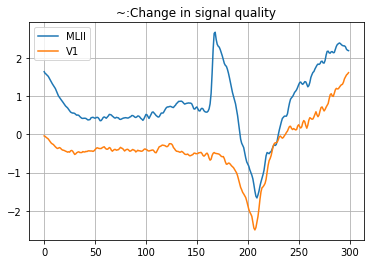

108
Length: 1824 1824
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'x', '~', '|', 'F', 'A', 'j'])
dict_values([1, 1739, 17, 11, 41, 8, 2, 4, 1])
Avg annotation rate:  1.0102153846153845


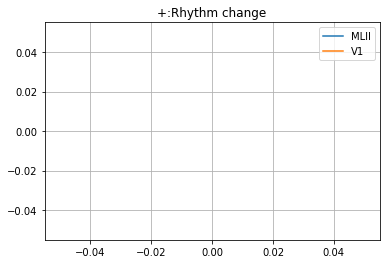

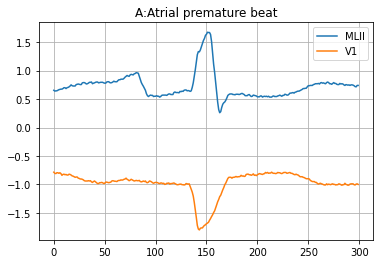

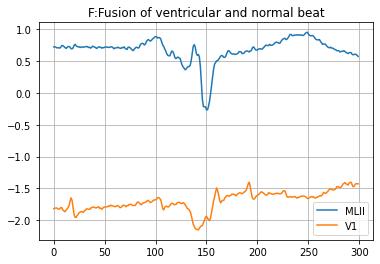

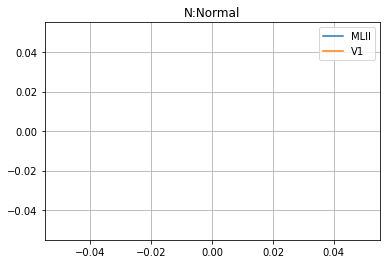

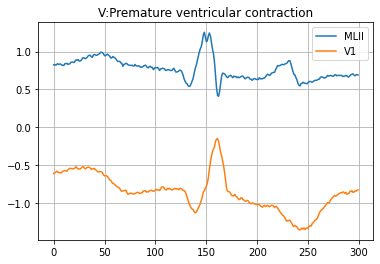

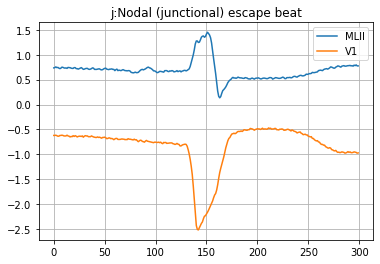

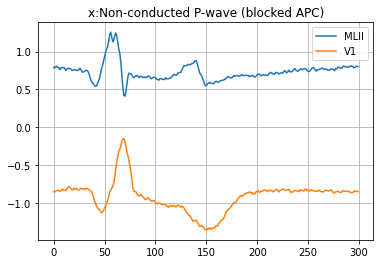

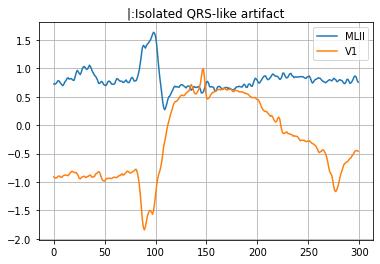

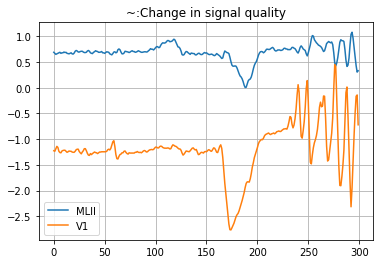

109
Length: 2535 2535
['MLII', 'V1']
dict_keys(['+', 'L', 'F', 'V', '~'])
dict_values([1, 2492, 2, 38, 2])
Avg annotation rate:  1.404


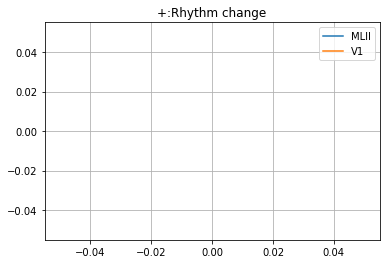

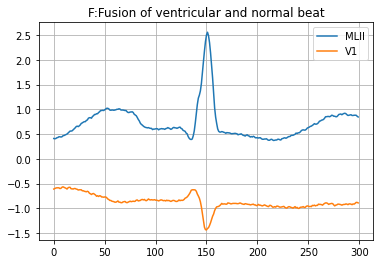

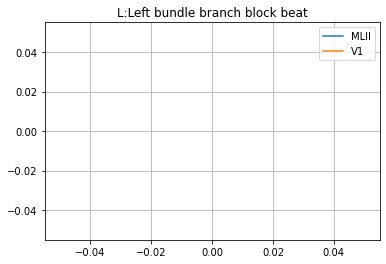

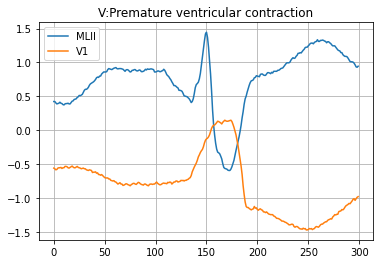

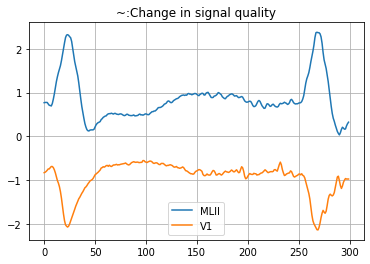

111
Length: 2133 2133
['MLII', 'V1']
dict_keys(['+', 'L', '~', 'V'])
dict_values([1, 2123, 8, 1])
Avg annotation rate:  1.181353846153846


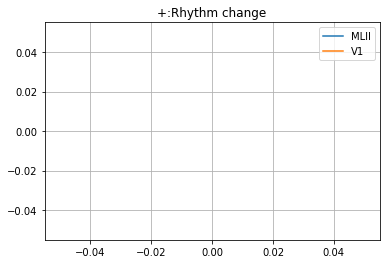

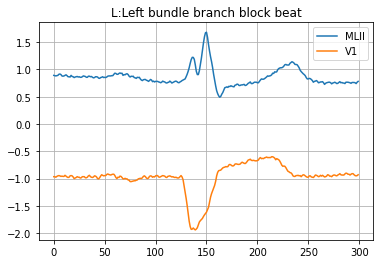

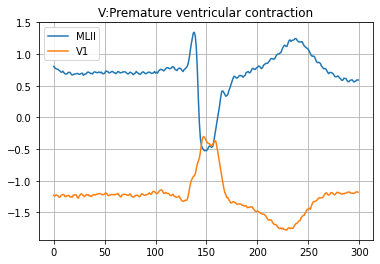

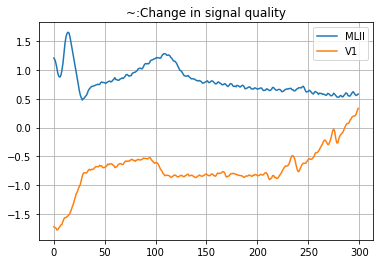

112
Length: 2550 2550
['MLII', 'V1']
dict_keys(['+', 'N', '~', 'A'])
dict_values([1, 2537, 10, 2])
Avg annotation rate:  1.4123076923076923


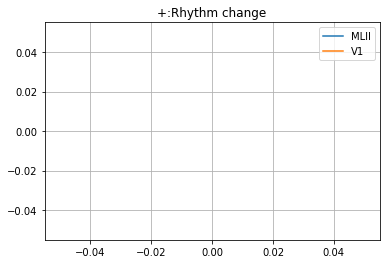

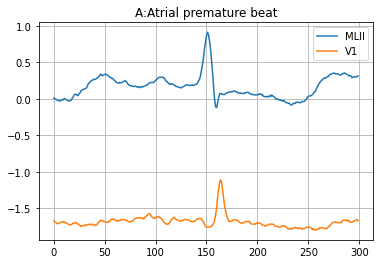

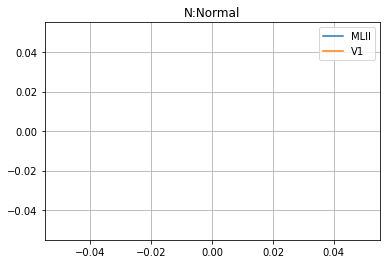

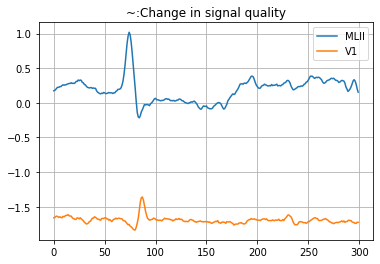

113
Length: 1796 1796
['MLII', 'V1']
dict_keys(['+', 'N', 'a'])
dict_values([1, 1789, 6])
Avg annotation rate:  0.9947076923076923


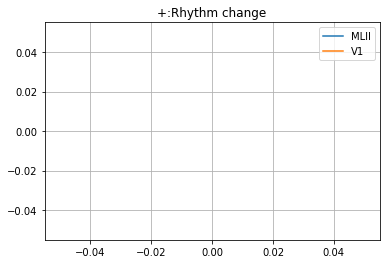

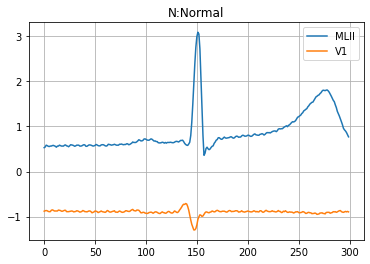

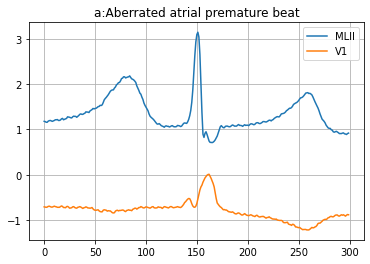

114
Length: 1890 1890
['V5', 'MLII']
dict_keys(['+', 'N', 'V', 'J', 'F', '|', '~', 'A'])
dict_values([3, 1820, 43, 2, 4, 1, 7, 10])
Avg annotation rate:  1.0467692307692307


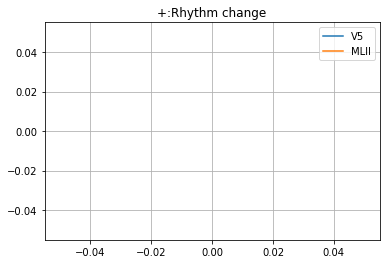

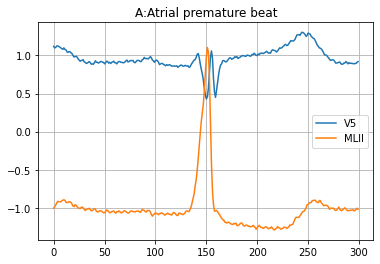

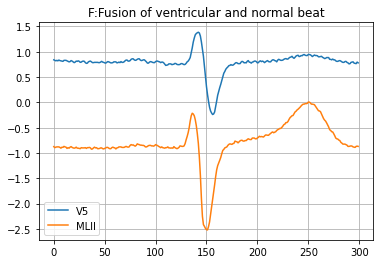

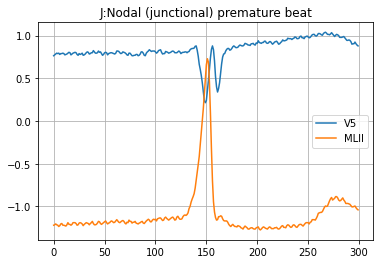

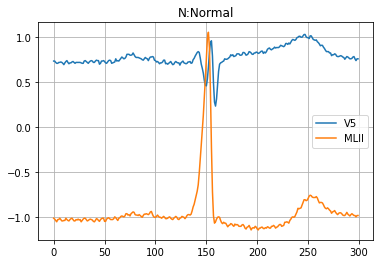

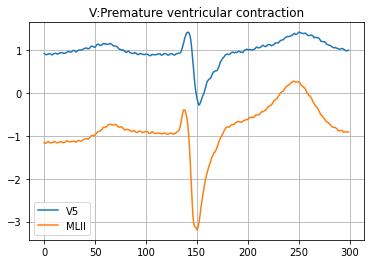

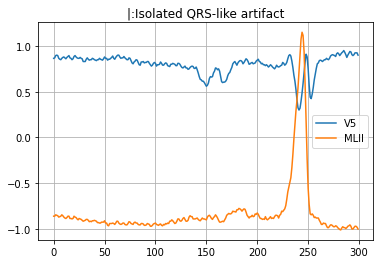

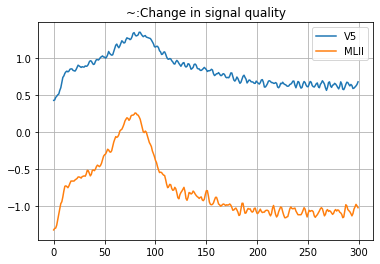

115
Length: 1962 1962
['MLII', 'V1']
dict_keys(['+', 'N', '~', '|'])
dict_values([1, 1953, 2, 6])
Avg annotation rate:  1.0866461538461538


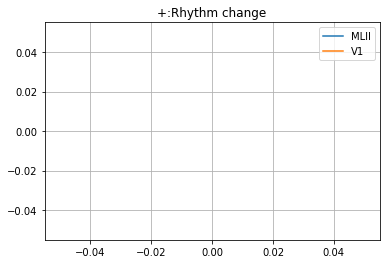

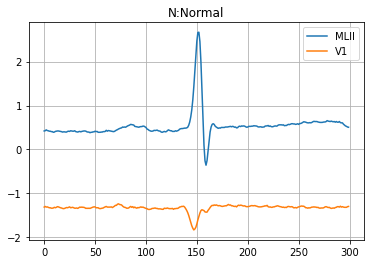

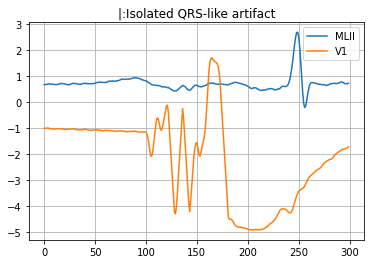

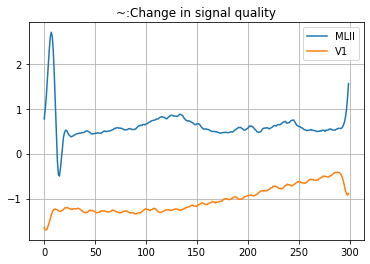

116
Length: 2421 2421
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'A', '~'])
dict_values([1, 2302, 109, 1, 8])
Avg annotation rate:  1.3408615384615383


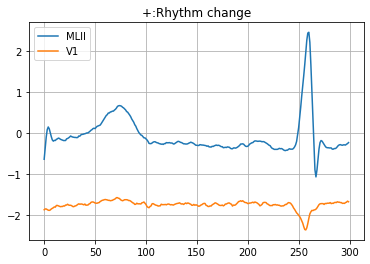

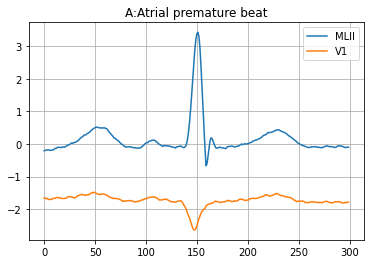

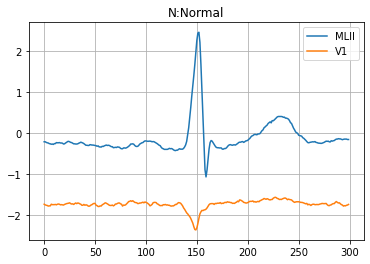

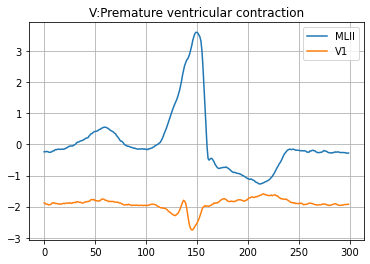

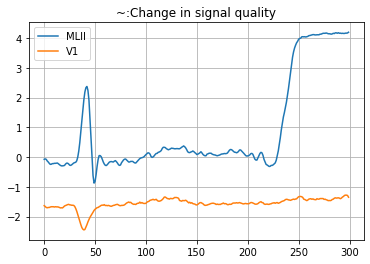

117
Length: 1539 1539
['MLII', 'V2']
dict_keys(['+', 'N', '~', 'A'])
dict_values([1, 1534, 3, 1])
Avg annotation rate:  0.8523692307692308


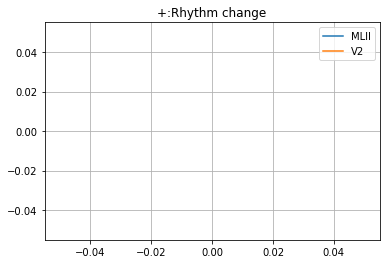

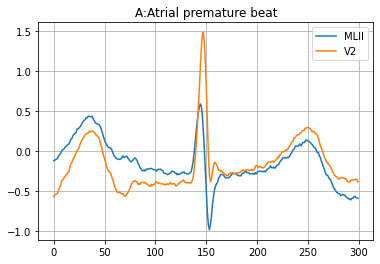

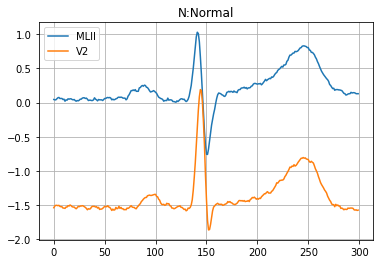

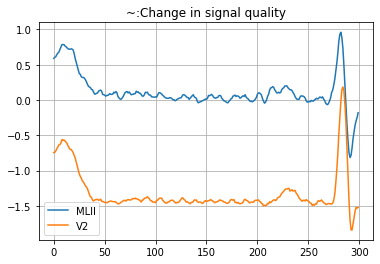

118
Length: 2301 2301
['MLII', 'V1']
dict_keys(['+', 'R', 'V', 'A', 'x', '~'])
dict_values([1, 2166, 16, 96, 10, 12])
Avg annotation rate:  1.2744


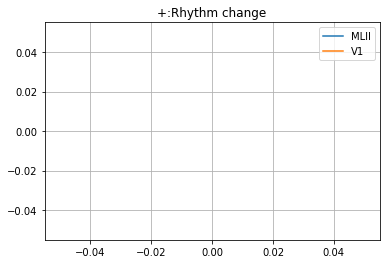

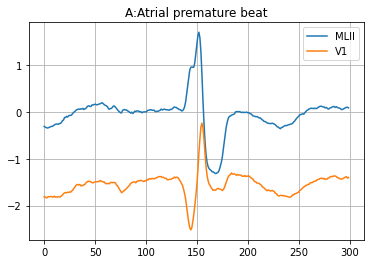

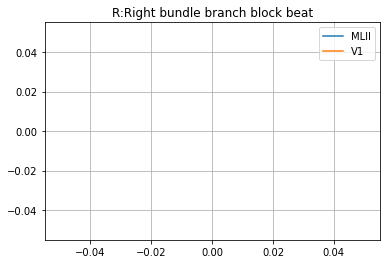

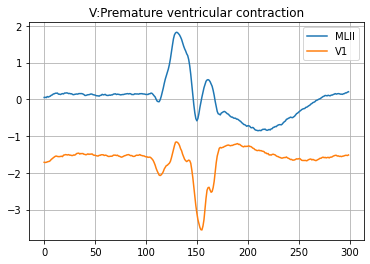

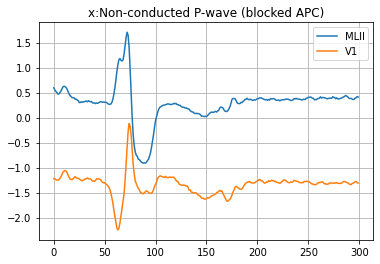

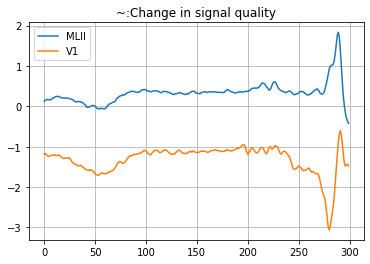

119
Length: 2094 2094
['MLII', 'V1']
dict_keys(['+', 'N', 'V', '~'])
dict_values([103, 1543, 444, 4])
Avg annotation rate:  1.1597538461538461


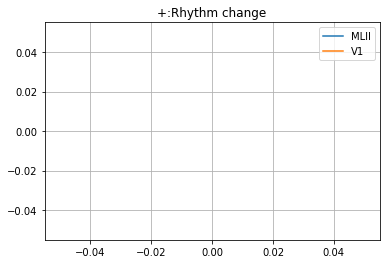

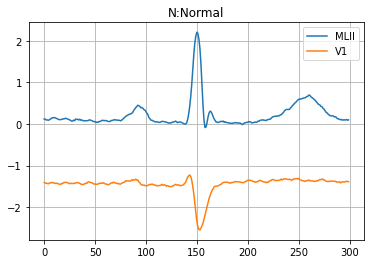

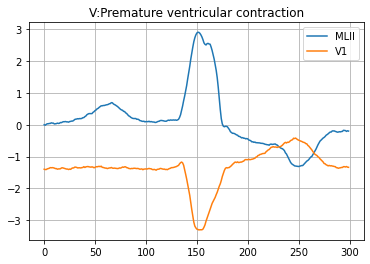

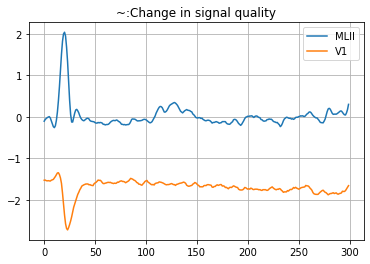

121
Length: 1876 1876
['MLII', 'V1']
dict_keys(['+', 'N', '~', 'A', 'V'])
dict_values([1, 1861, 12, 1, 1])
Avg annotation rate:  1.0390153846153845


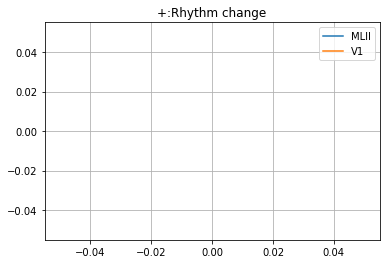

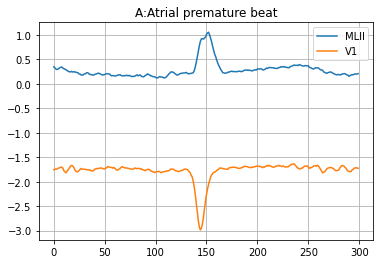

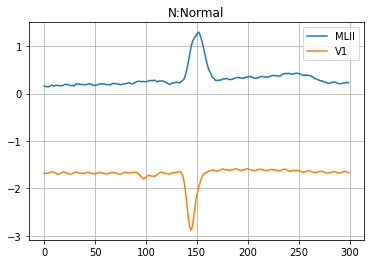

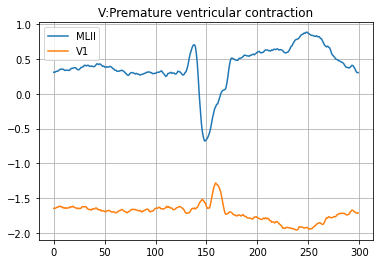

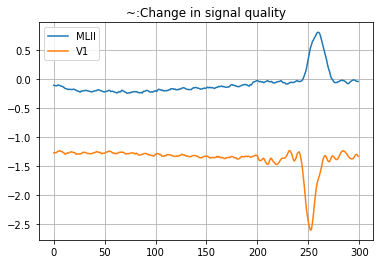

122
Length: 2479 2479
['MLII', 'V1']
dict_keys(['+', 'N', '|'])
dict_values([1, 2476, 2])
Avg annotation rate:  1.3729846153846152


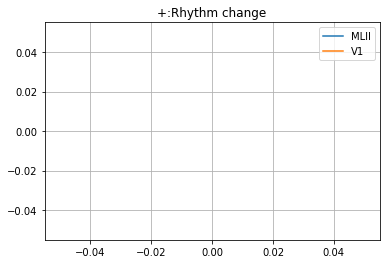

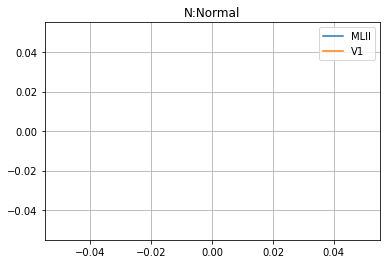

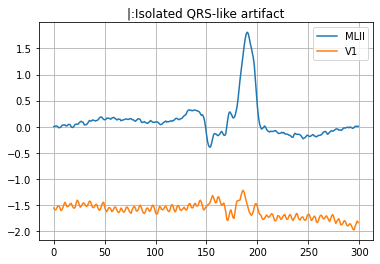

123
Length: 1519 1519
['MLII', 'V5']
dict_keys(['+', 'N', 'V'])
dict_values([1, 1515, 3])
Avg annotation rate:  0.8412923076923077


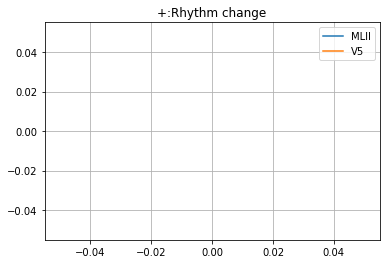

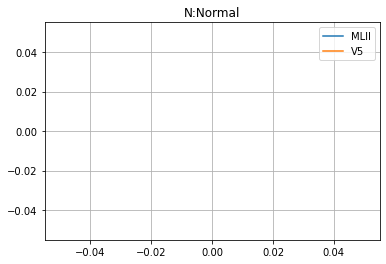

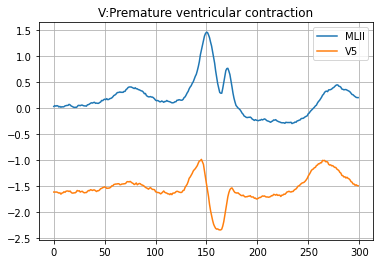

124
Length: 1634 1634
['MLII', 'V4']
dict_keys(['+', 'R', 'J', 'V', 'F', 'A', '~', 'j'])
dict_values([13, 1531, 29, 47, 5, 2, 2, 5])
Avg annotation rate:  0.9049846153846154


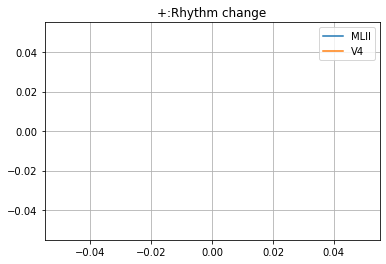

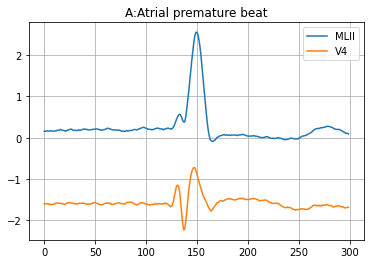

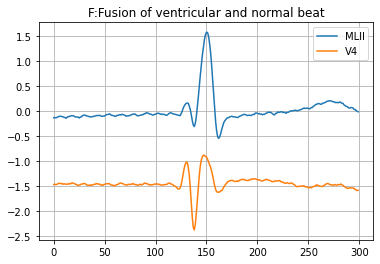

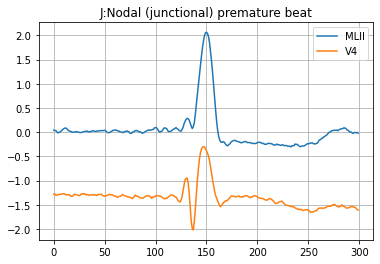

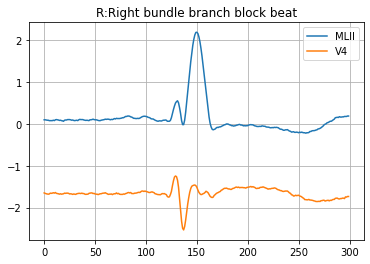

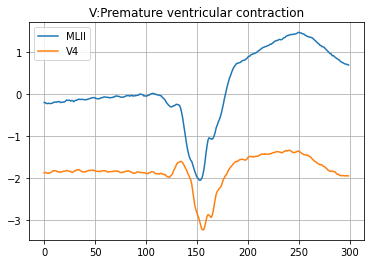

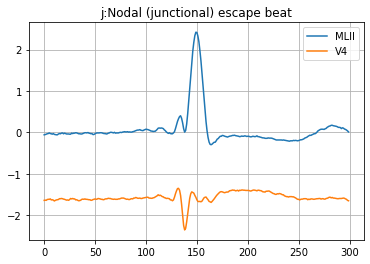

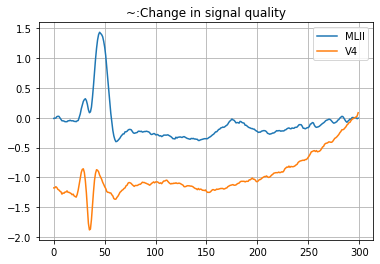

200
Length: 2792 2792
['MLII', 'V1']
dict_keys(['+', 'V', 'N', 'A', '~', 'F'])
dict_values([148, 826, 1743, 30, 43, 2])
Avg annotation rate:  1.5463384615384614


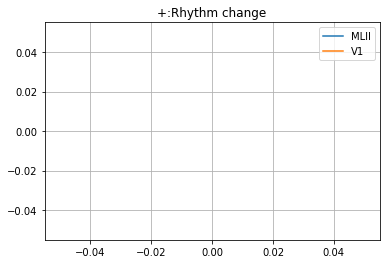

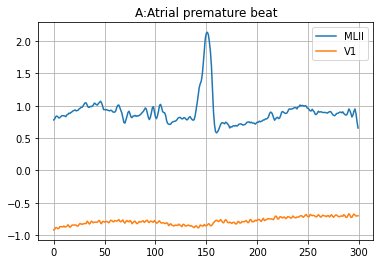

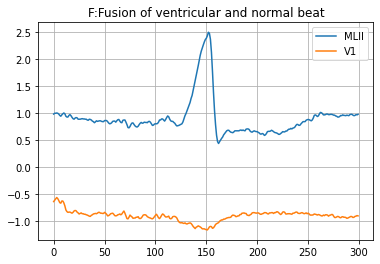

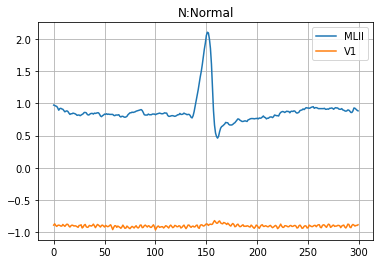

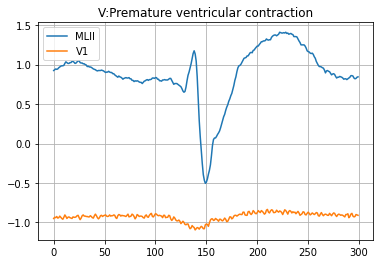

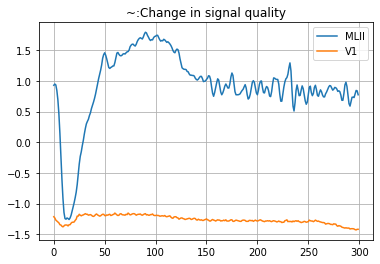

201
Length: 2039 2039
['MLII', 'V1']
dict_keys(['+', 'N', 'a', 'j', 'V', 'x', 'A', 'J', '~', 'F'])
dict_values([35, 1625, 97, 10, 198, 37, 30, 1, 4, 2])
Avg annotation rate:  1.1292923076923076


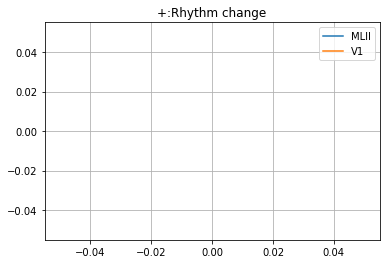

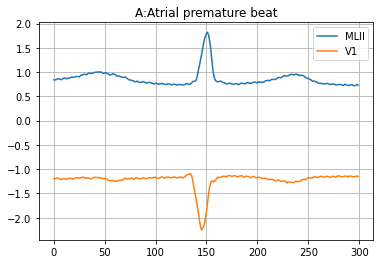

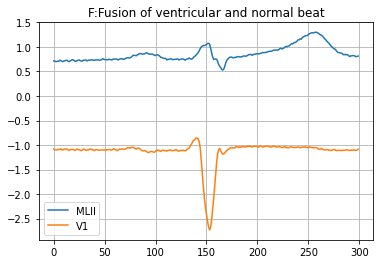

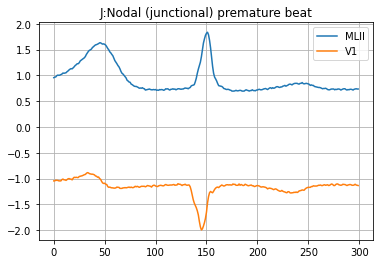

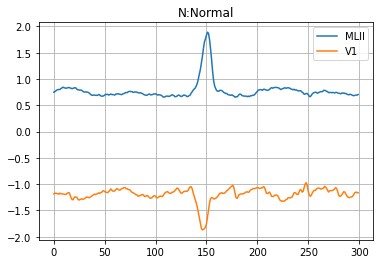

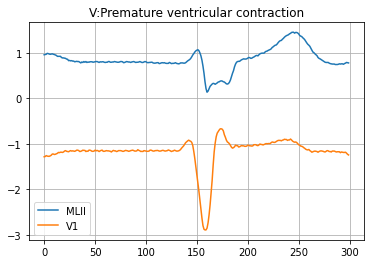

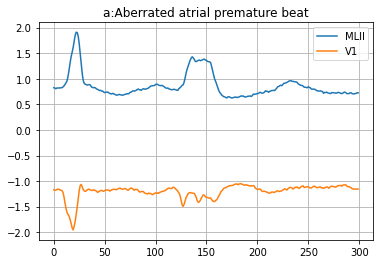

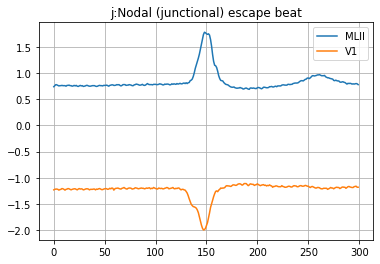

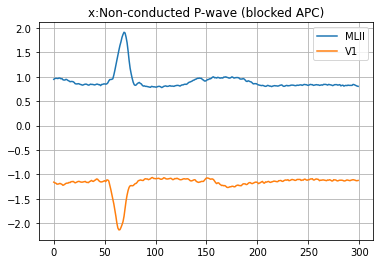

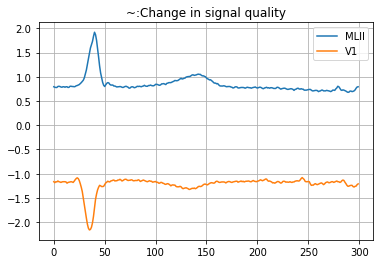

202
Length: 2146 2146
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'A', '|', 'a', 'F'])
dict_values([8, 2061, 19, 36, 2, 19, 1])
Avg annotation rate:  1.188553846153846


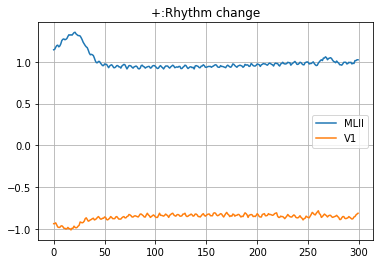

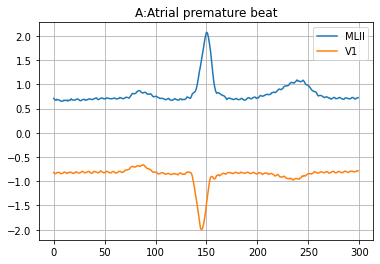

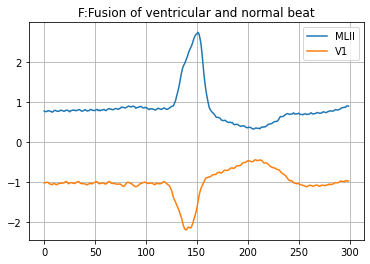

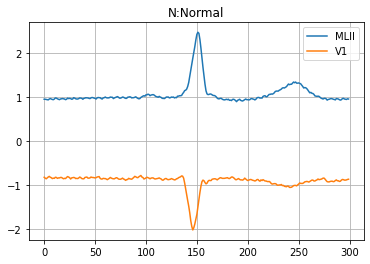

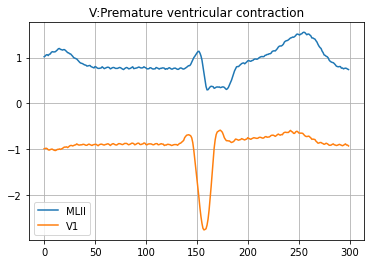

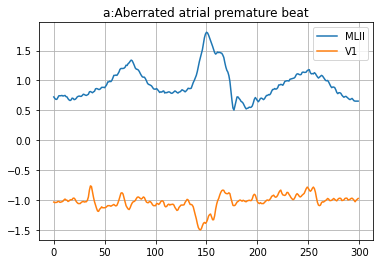

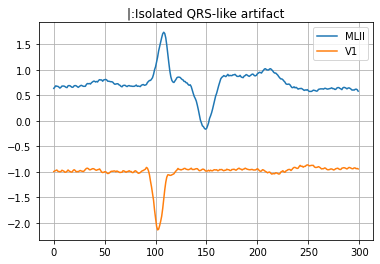

203
Length: 3108 3108
['MLII', 'V1']
dict_keys(['+', '~', 'N', 'V', 'a', '|', 'Q', 'F'])
dict_values([45, 57, 2529, 444, 2, 26, 4, 1])
Avg annotation rate:  1.721353846153846


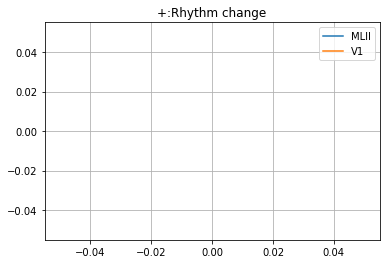

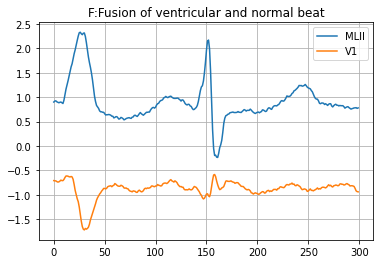

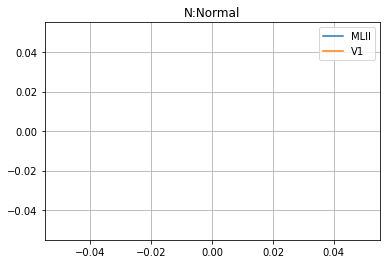

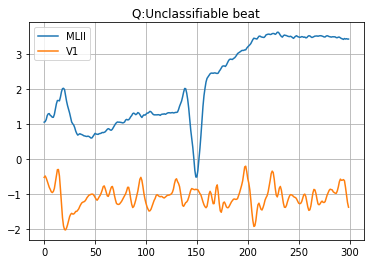

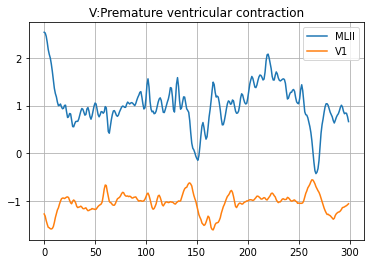

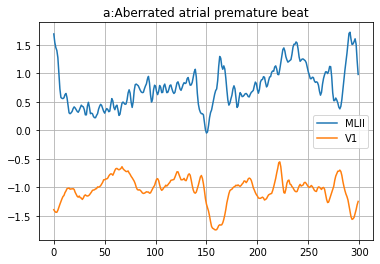

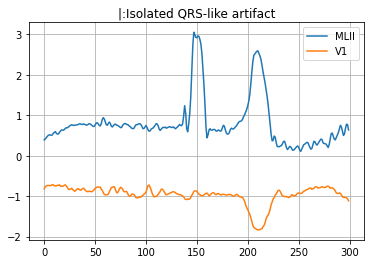

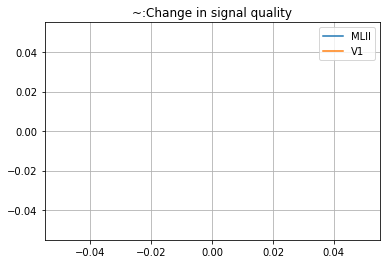

205
Length: 2672 2672
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'A', 'F', '~', '|'])
dict_values([13, 2571, 71, 3, 11, 2, 1])
Avg annotation rate:  1.479876923076923


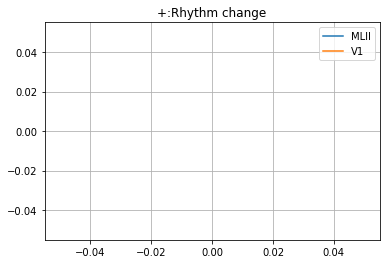

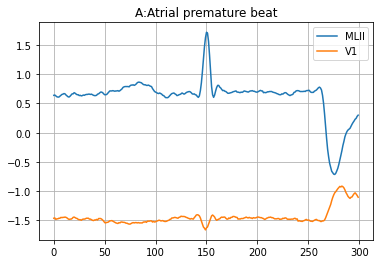

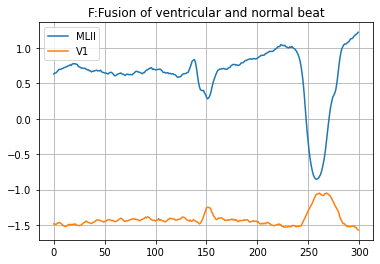

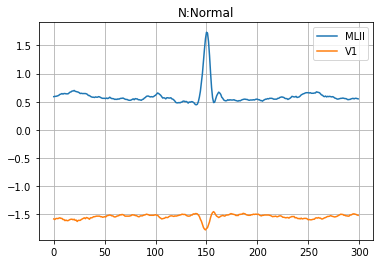

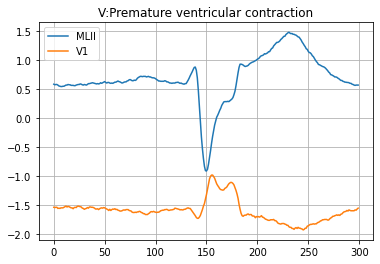

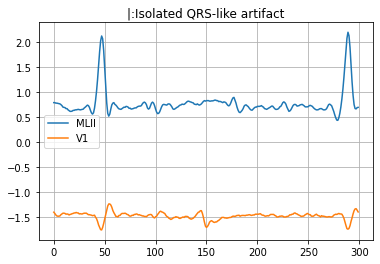

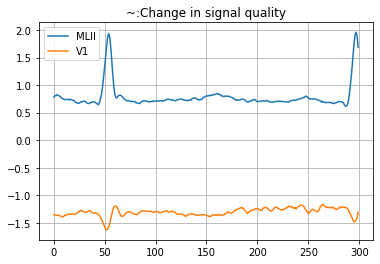

207
Length: 2385 2385
['MLII', 'V1']
dict_keys(['+', 'R', 'V', 'L', '[', '!', ']', '~', '|', 'E', 'A'])
dict_values([24, 86, 105, 1457, 6, 472, 6, 15, 2, 105, 107])
Avg annotation rate:  1.3209230769230769


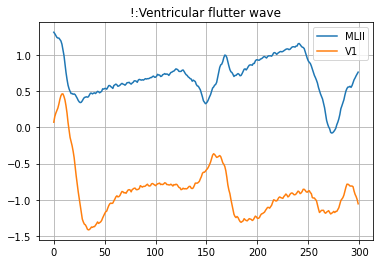

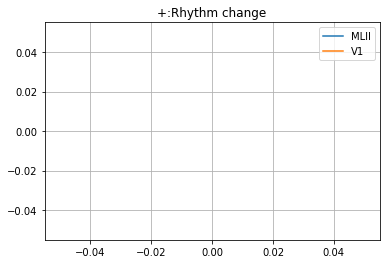

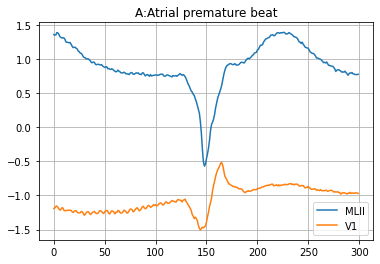

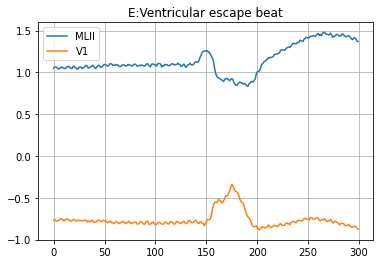

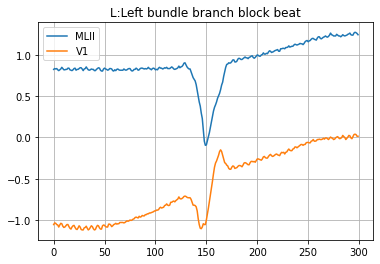

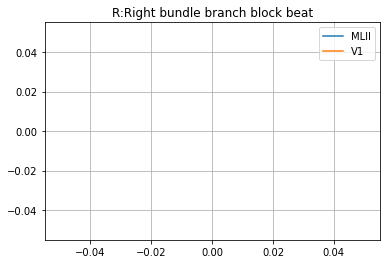

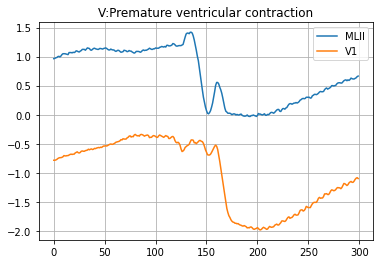

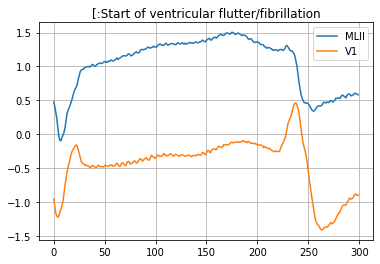

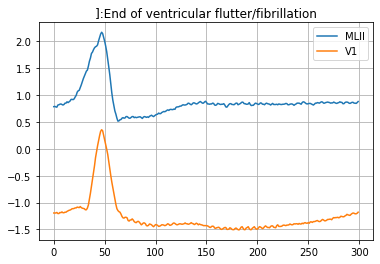

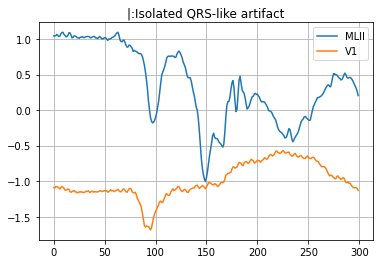

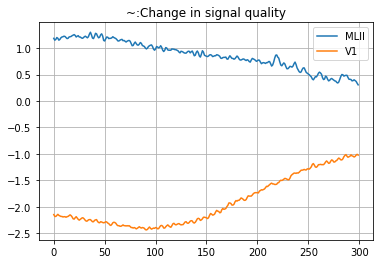

208
Length: 3040 3040
['MLII', 'V1']
dict_keys(['+', 'F', 'V', 'N', '~', '|', 'S', 'Q'])
dict_values([53, 373, 992, 1586, 24, 8, 2, 2])
Avg annotation rate:  1.6836923076923076


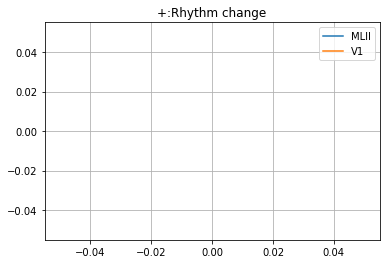

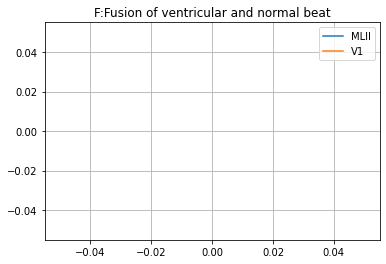

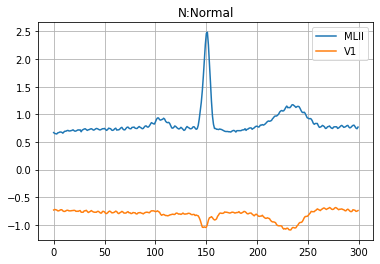

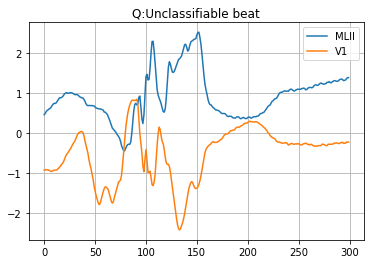

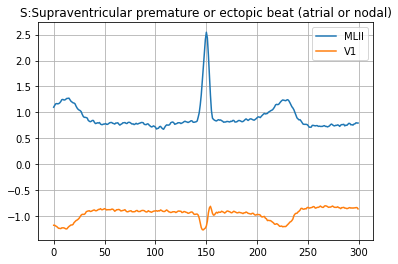

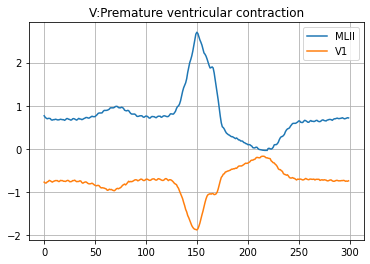

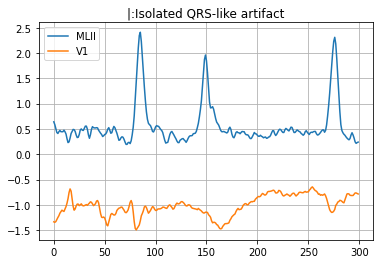

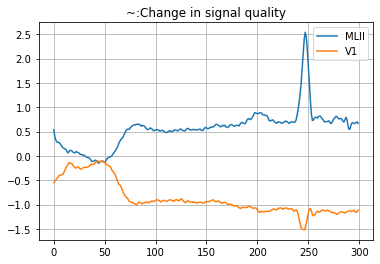

209
Length: 3052 3052
['MLII', 'V1']
dict_keys(['+', 'N', 'A', '|', '~', 'V'])
dict_values([21, 2621, 383, 7, 19, 1])
Avg annotation rate:  1.6903384615384613


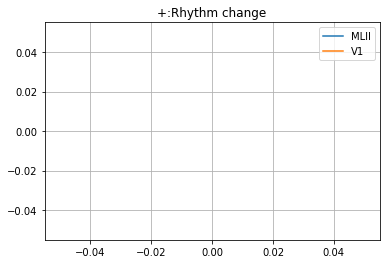

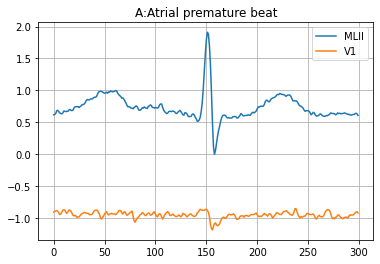

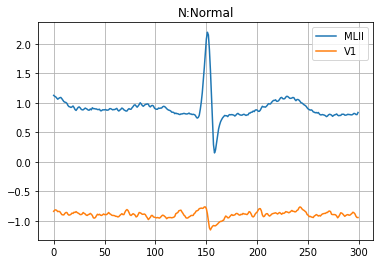

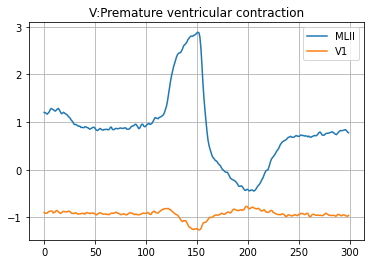

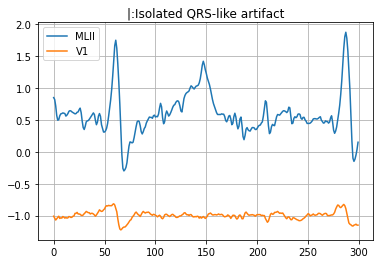

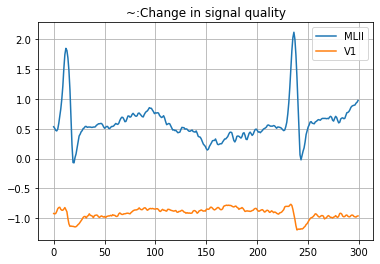

210
Length: 2685 2685
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'F', '~', 'a', '|', 'E'])
dict_values([17, 2423, 194, 10, 17, 22, 1, 1])
Avg annotation rate:  1.487076923076923


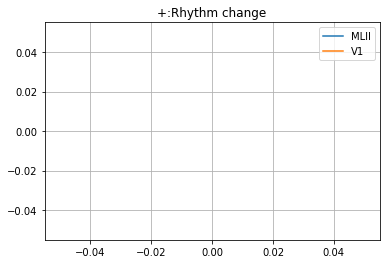

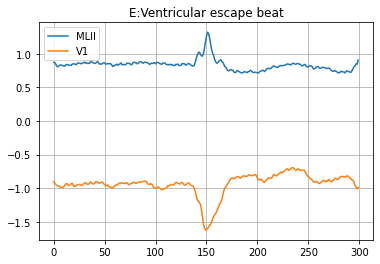

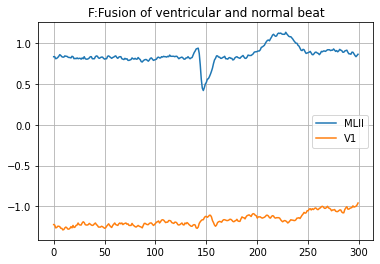

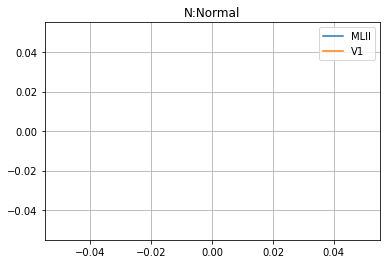

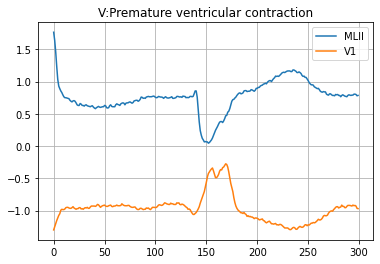

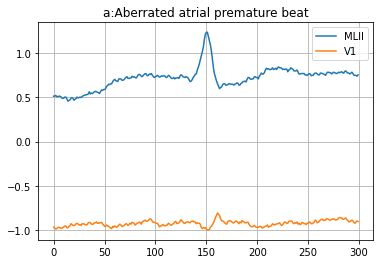

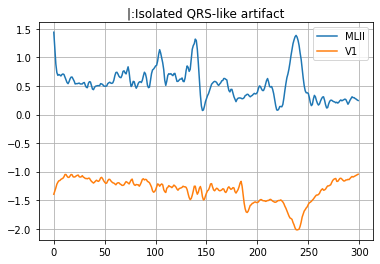

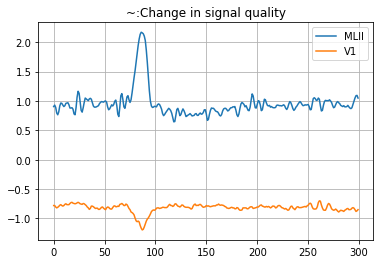

212
Length: 2763 2763
['MLII', 'V1']
dict_keys(['+', 'R', 'N', '~', '|'])
dict_values([1, 1825, 923, 13, 1])
Avg annotation rate:  1.530276923076923


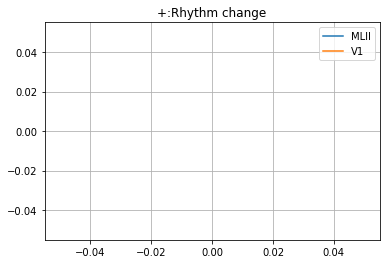

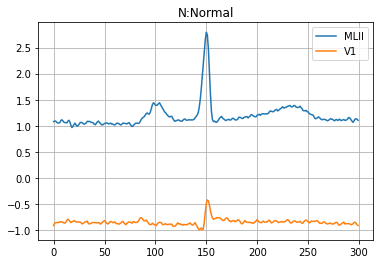

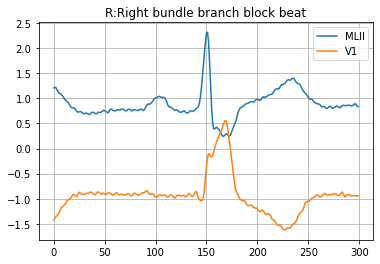

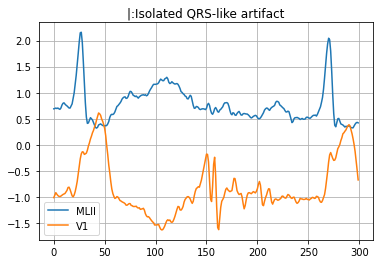

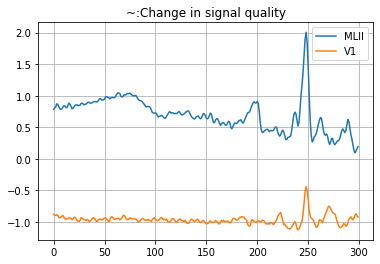

213
Length: 3294 3294
['MLII', 'V1']
dict_keys(['+', 'N', 'F', 'A', 'V', 'a'])
dict_values([43, 2641, 362, 25, 220, 3])
Avg annotation rate:  1.8243692307692307


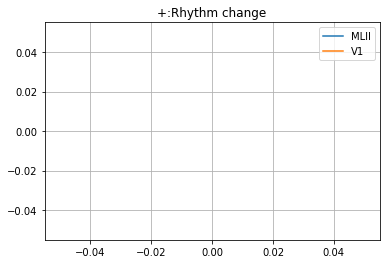

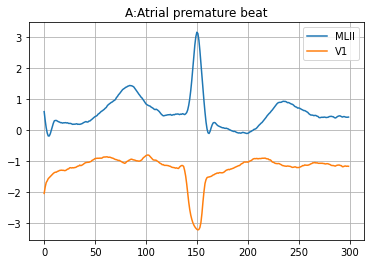

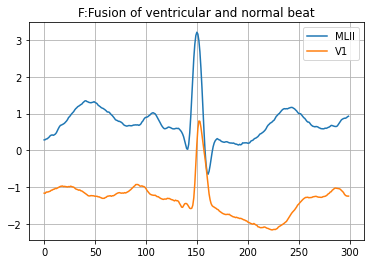

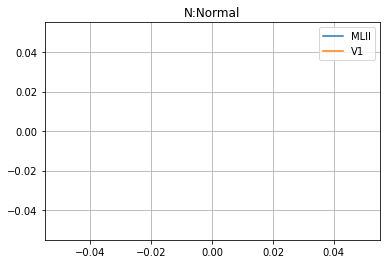

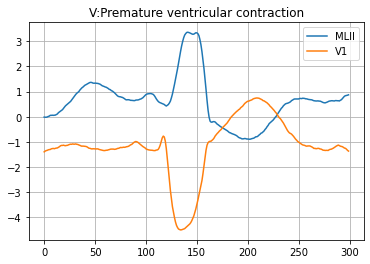

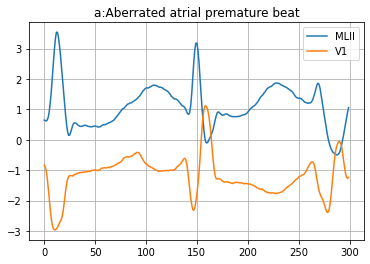

214
Length: 2297 2297
['MLII', 'V1']
dict_keys(['+', 'L', 'V', '~', '|', 'Q', '"', 'F'])
dict_values([25, 2003, 256, 4, 5, 2, 1, 1])
Avg annotation rate:  1.2721846153846152


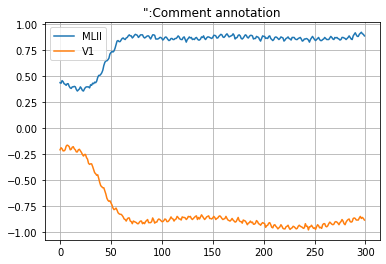

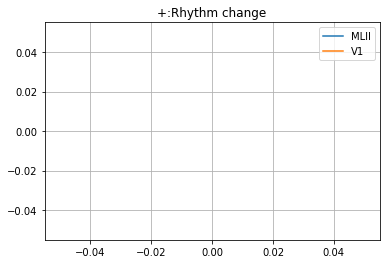

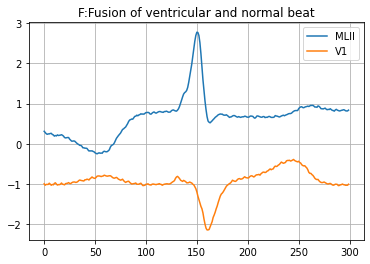

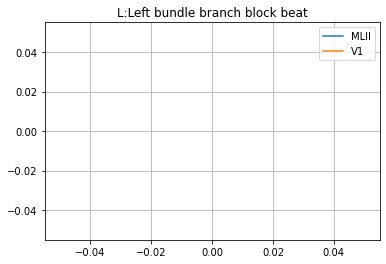

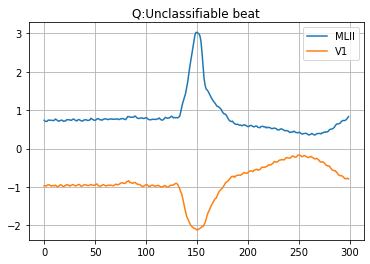

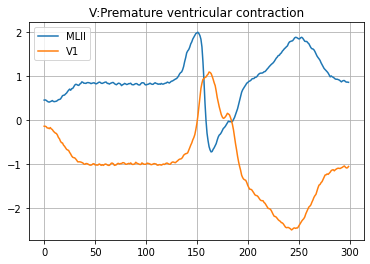

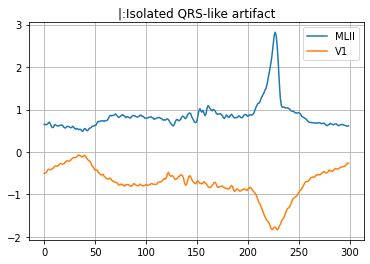

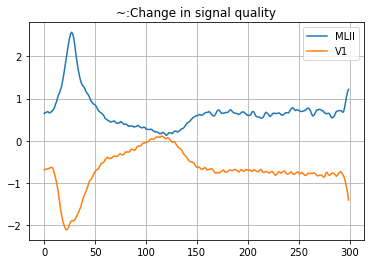

215
Length: 3400 3400
['MLII', 'V1']
dict_keys(['+', 'N', 'V', '~', 'A', '"', 'F'])
dict_values([5, 3195, 164, 30, 3, 2, 1])
Avg annotation rate:  1.8830769230769229


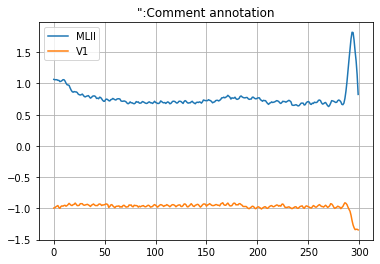

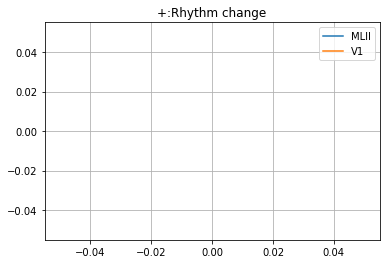

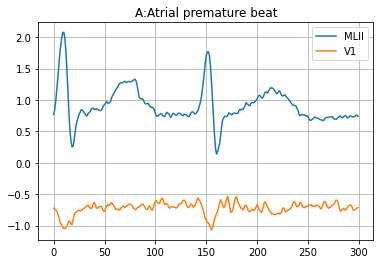

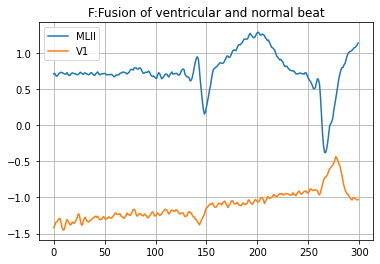

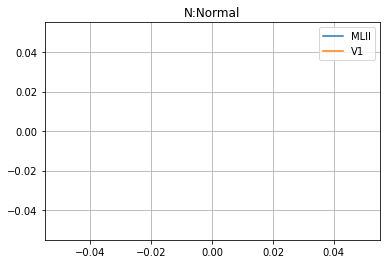

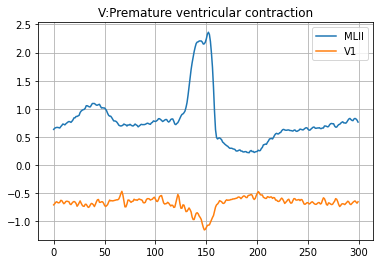

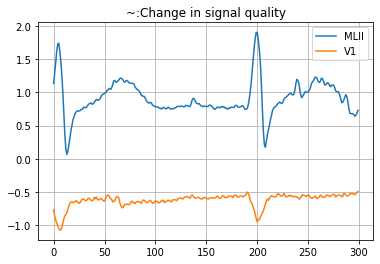

217
Length: 2280 2280
['MLII', 'V1']
dict_keys(['+', '/', 'f', 'V', 'N', '~', '|'])
dict_values([67, 1542, 260, 162, 244, 4, 1])
Avg annotation rate:  1.2627692307692306


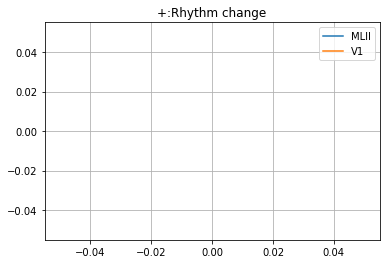

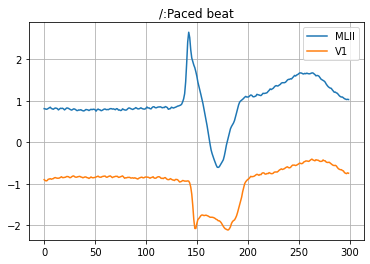

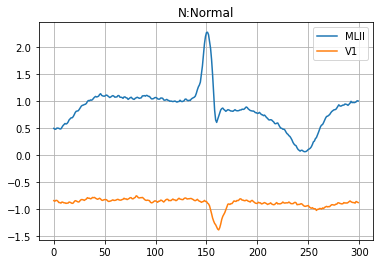

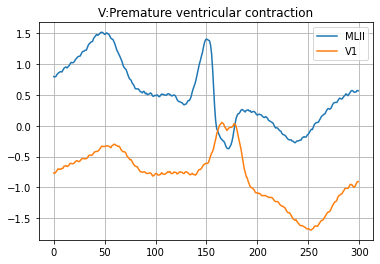

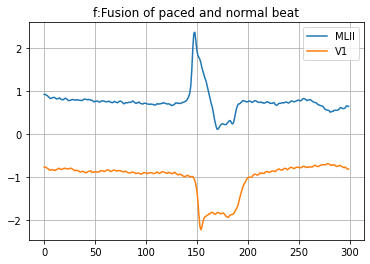

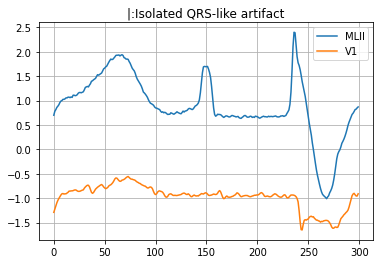

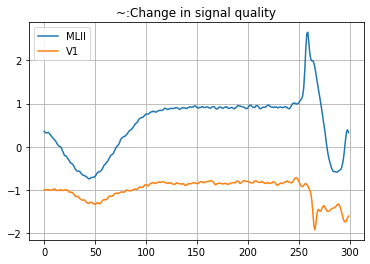

219
Length: 2312 2312
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'F', '"', 'A', 'x'])
dict_values([21, 2082, 64, 1, 4, 7, 133])
Avg annotation rate:  1.2804923076923076


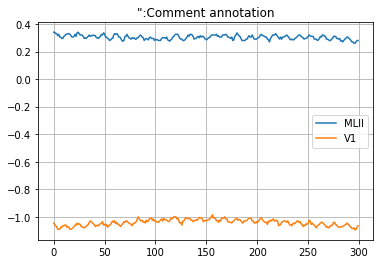

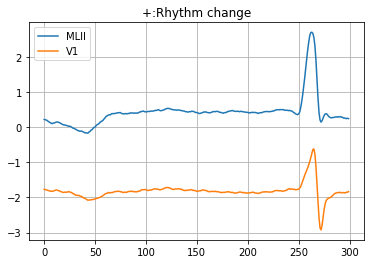

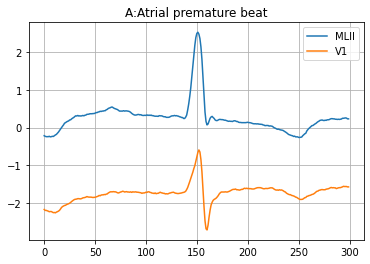

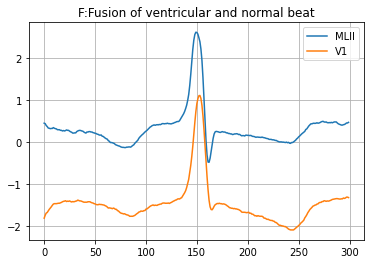

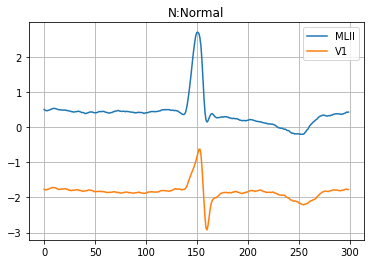

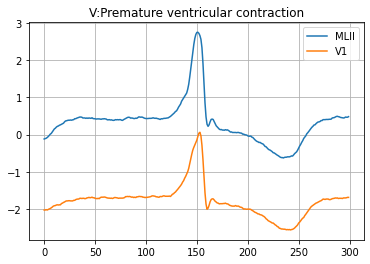

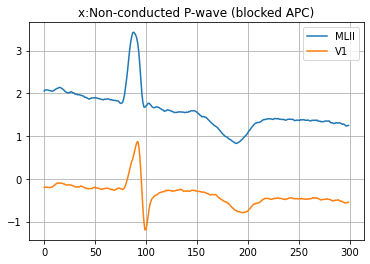

220
Length: 2069 2069
['MLII', 'V1']
dict_keys(['+', 'N', 'A', '~'])
dict_values([17, 1954, 94, 4])
Avg annotation rate:  1.1459076923076923


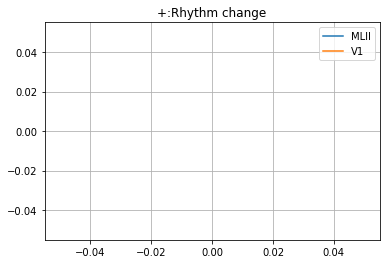

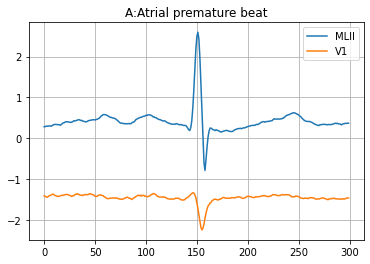

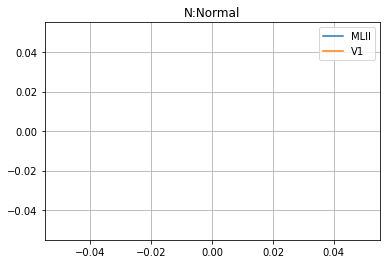

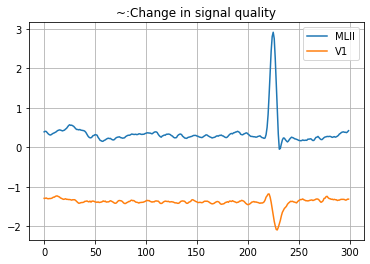

221
Length: 2462 2462
['MLII', 'V1']
dict_keys(['+', 'N', 'V', '~'])
dict_values([23, 2031, 396, 12])
Avg annotation rate:  1.3635692307692306


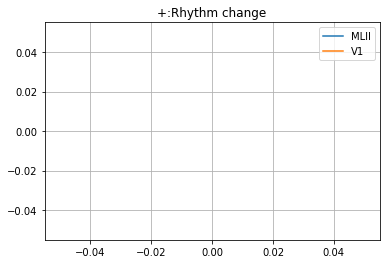

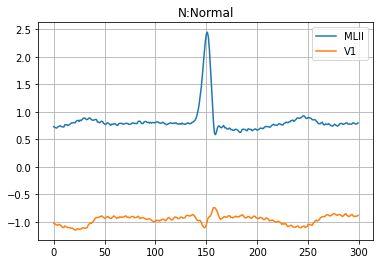

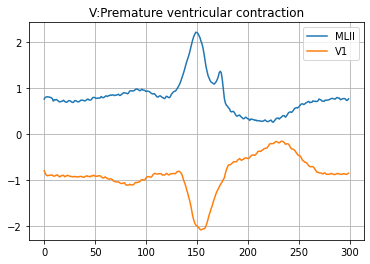

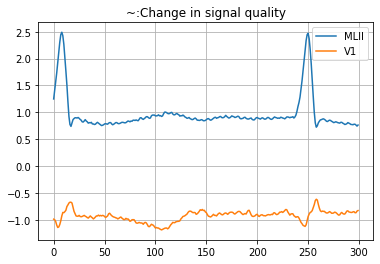

222
Length: 2634 2634
['MLII', 'V1']
dict_keys(['+', 'N', '~', 'A', 'j', 'J'])
dict_values([136, 2062, 15, 208, 212, 1])
Avg annotation rate:  1.4588307692307692


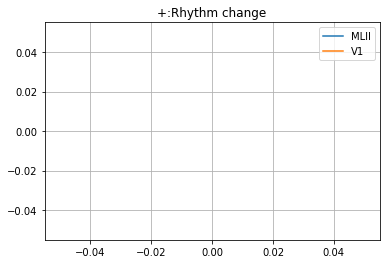

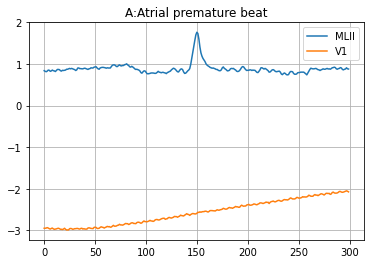

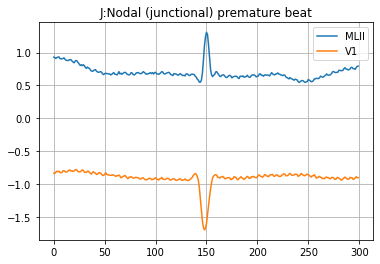

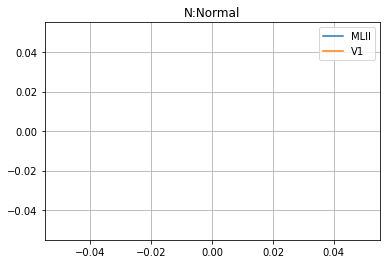

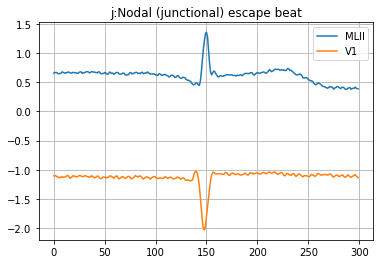

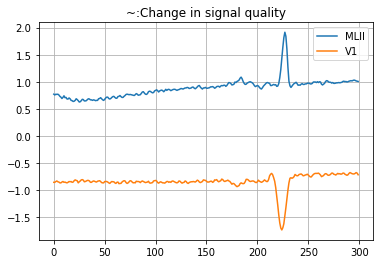

223
Length: 2643 2643
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'A', 'e', 'F', '~', 'a'])
dict_values([28, 2029, 473, 72, 16, 14, 10, 1])
Avg annotation rate:  1.4638153846153845


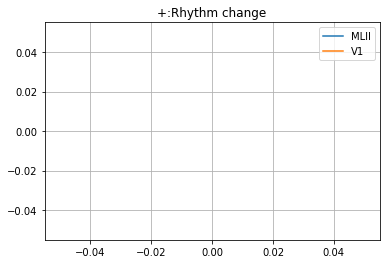

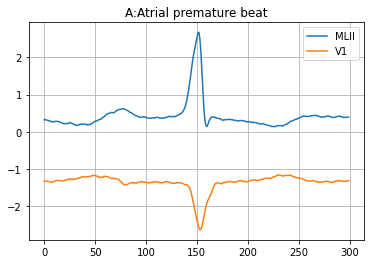

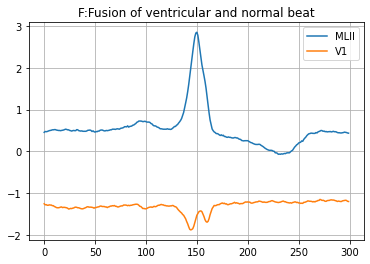

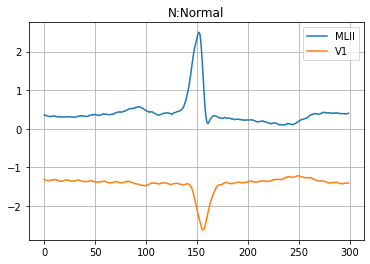

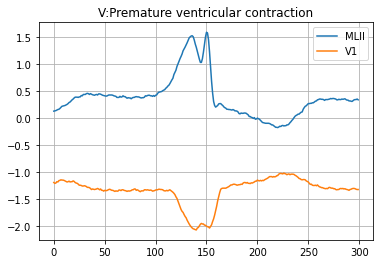

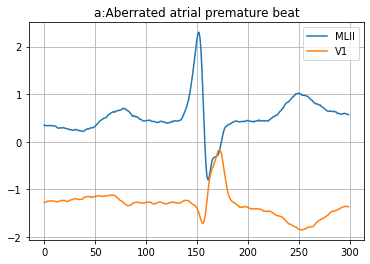

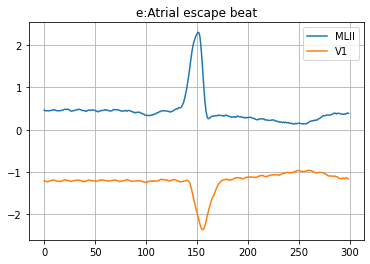

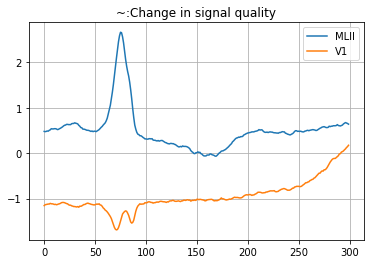

228
Length: 2141 2141
['MLII', 'V1']
dict_keys(['+', 'N', '|', 'V', '~', 'A', '"'])
dict_values([41, 1688, 24, 362, 20, 3, 3])
Avg annotation rate:  1.1857846153846152


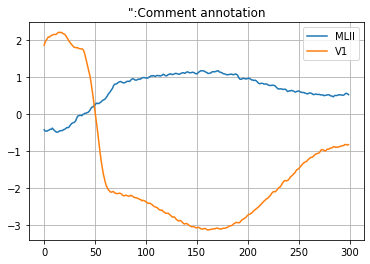

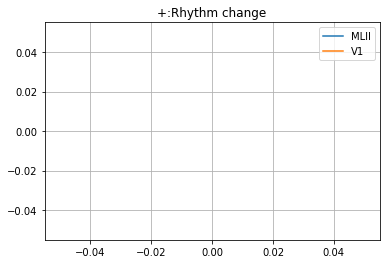

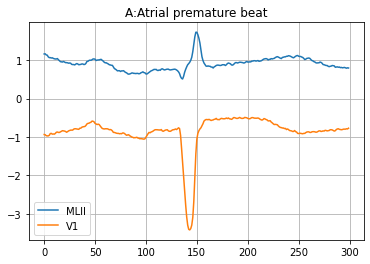

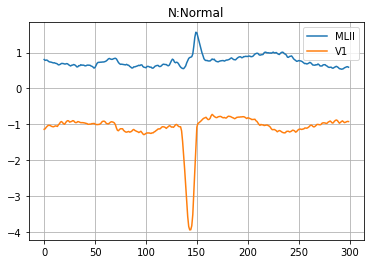

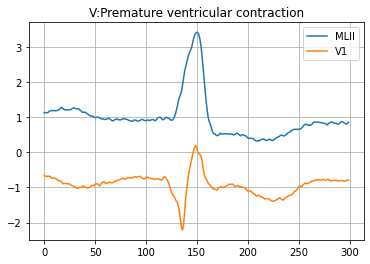

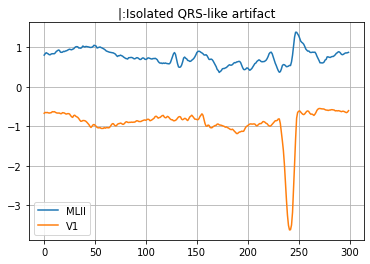

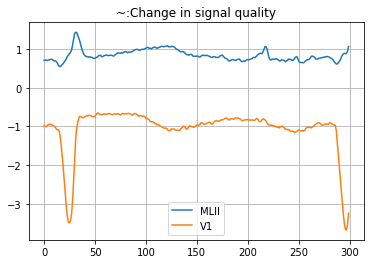

230
Length: 2466 2466
['MLII', 'V1']
dict_keys(['+', 'N', '~', '|', 'V'])
dict_values([207, 2255, 2, 1, 1])
Avg annotation rate:  1.3657846153846154


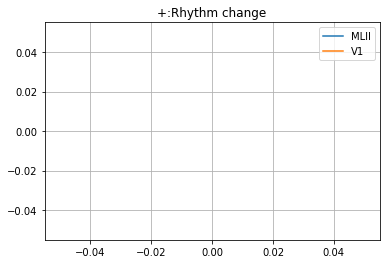

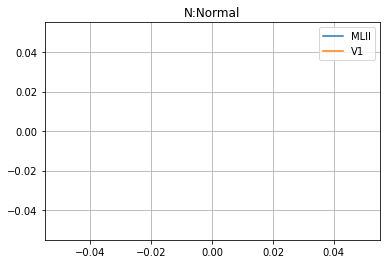

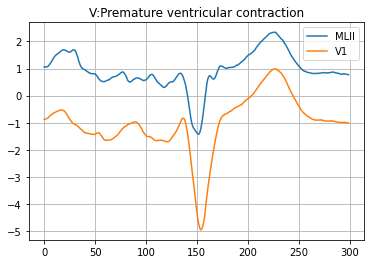

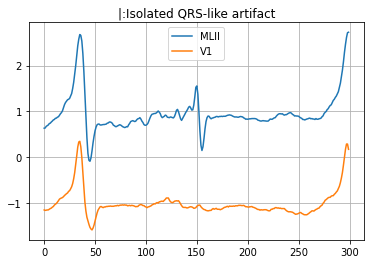

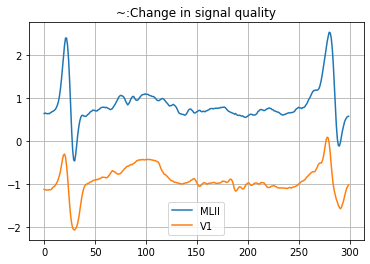

231
Length: 2011 2011
['MLII', 'V1']
dict_keys(['+', 'R', '"', 'N', 'x', 'A', 'V'])
dict_values([11, 1254, 427, 314, 2, 1, 2])
Avg annotation rate:  1.1137846153846154


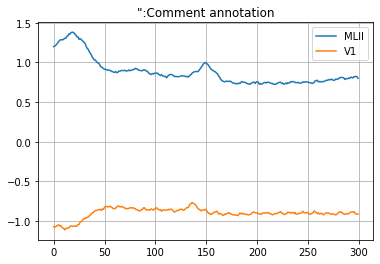

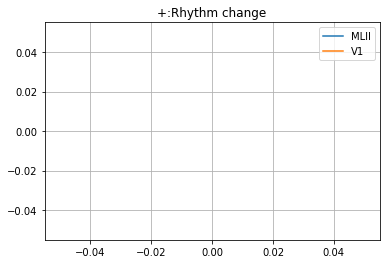

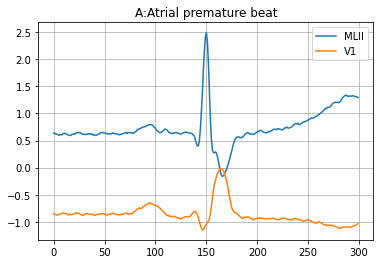

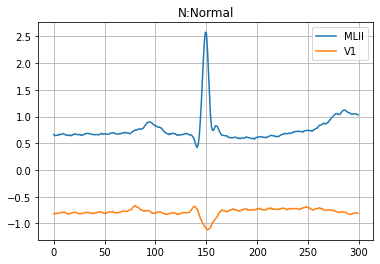

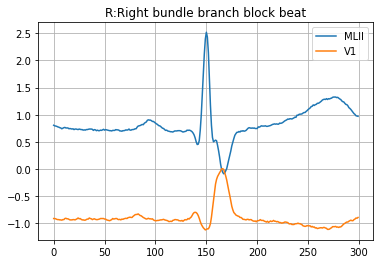

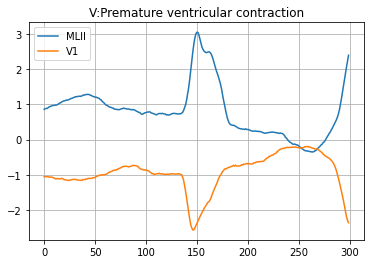

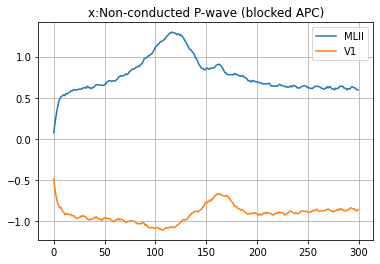

232
Length: 1816 1816
['MLII', 'V1']
dict_keys(['+', 'R', 'A', '~', 'j'])
dict_values([1, 397, 1382, 35, 1])
Avg annotation rate:  1.0057846153846153


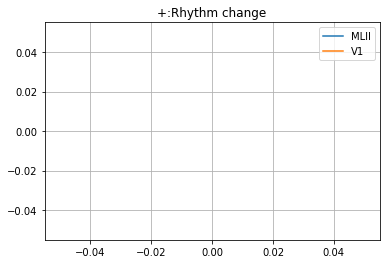

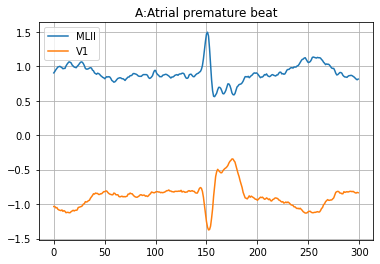

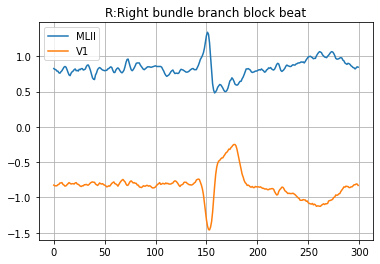

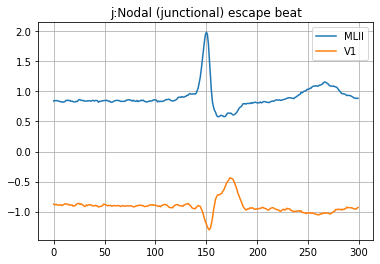

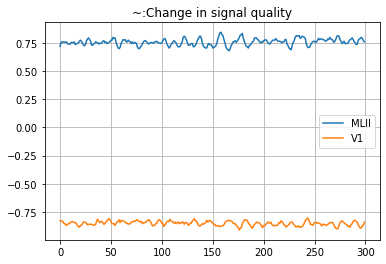

233
Length: 3152 3152
['MLII', 'V1']
dict_keys(['+', 'V', 'N', 'A', 'F', '|'])
dict_values([71, 831, 2230, 7, 11, 2])
Avg annotation rate:  1.745723076923077


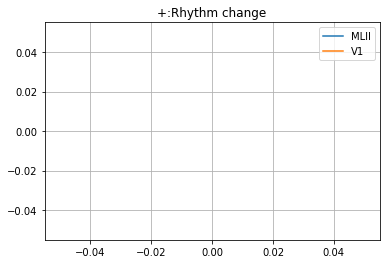

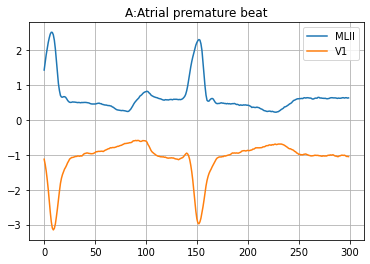

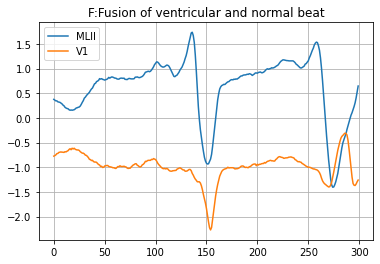

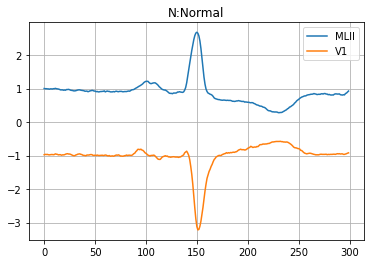

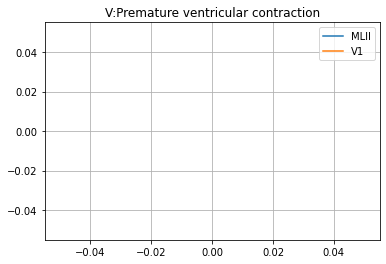

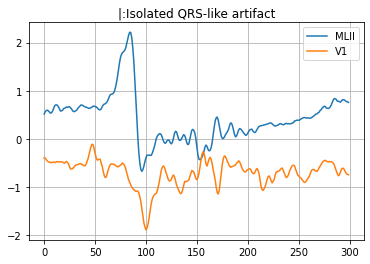

234
Length: 2764 2764
['MLII', 'V1']
dict_keys(['+', 'N', '~', 'J', 'V'])
dict_values([3, 2700, 8, 50, 3])
Avg annotation rate:  1.5308307692307692


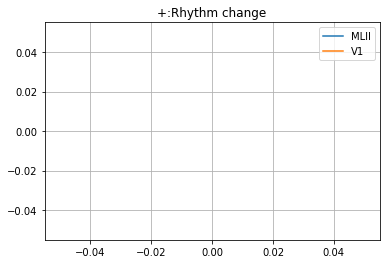

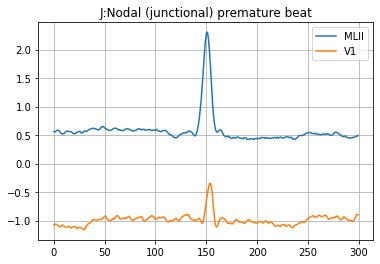

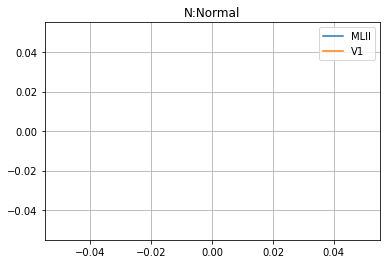

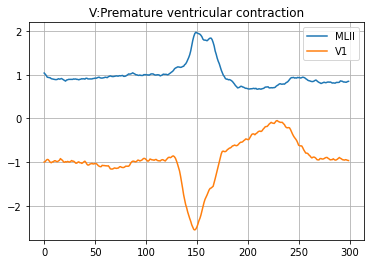

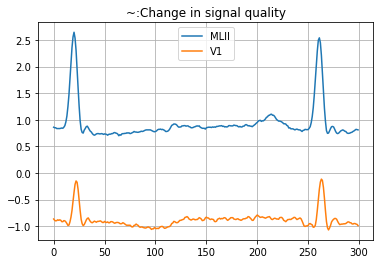

In [5]:
#     n = 207
for n in n_list:
    print(n)
    signals, fields = wfdb.rdsamp('data/' + str(n))
    # record = wfdb.rdsamp('data/' + str(n), sampto=3000)
    annotation = wfdb.rdann('data/' + str(n), 'atr')

    labels = annotation.symbol
    length = annotation.ann_len
    locs = annotation.sample # sample locations
    print("Length:",length, len(locs))
    # print(np.unique(labels)) 
    # print(length/fields["sig_len"])
    print(fields["sig_name"])
    print(Counter(labels).keys()) # equals to list(set(words))
    print(Counter(labels).values()) # counts the elements' frequency
    print("Avg annotation rate: ", len(locs)/(fields["sig_len"]/360))
    plot_unique(signals,fields,labels,locs)

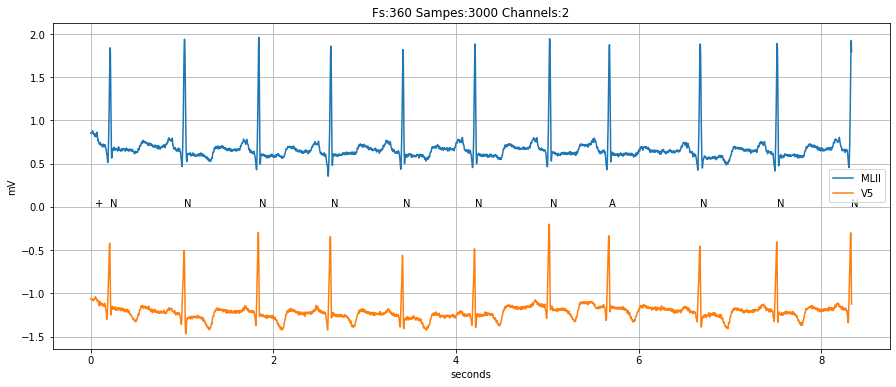

['69 M 1085 1629 x1', 'Aldomet, Inderal']


In [138]:
plot_ecg(signals,fields,annotation)

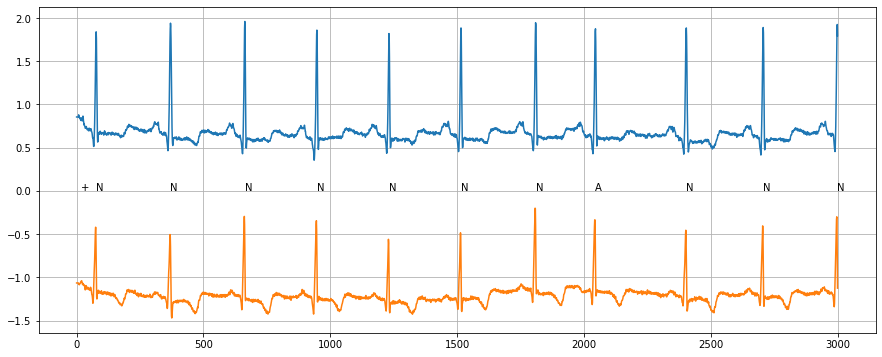

In [5]:
n=100
signals, fields = wfdb.rdsamp('data/' + str(n), sampto=3000)
annotation = wfdb.rdann('data/' + str(n), 'atr', sampto=3000)

labels = annotation.symbol
length = annotation.ann_len
locs = annotation.sample # sample locations

t = np.arange(fields["sig_len"])/fields["fs"]
plt.figure(figsize= (15,6))
plt.plot(signals[:,0] + 1)
plt.plot(signals[:,1] - 1)
for i in range(length):
    plt.annotate(labels[i],(locs[i],0))
plt.grid()
plt.show()

# plot_ecg(signals, fields, annotation)

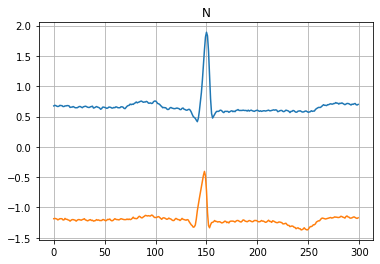

In [6]:
idx = 10
delta = 150

sig1 = signals[locs[idx]-delta:locs[idx]+delta,0]
sig2 = signals[locs[idx]-delta:locs[idx]+delta,1]

plt.plot(sig1 + 1)
plt.plot(sig2 - 1)
plt.title(labels[idx])
plt.grid()
plt.show()

In [13]:
from scipy.stats import skew, kurtosis, moment

mean :  -0.1687333333333333
var  :  0.05999406222222221
skew :  4.715516196694795
kurt :  24.564337071458464
0.05999406222222221
0.06894641469792592
0.09921197392011726
0.1447366280696794


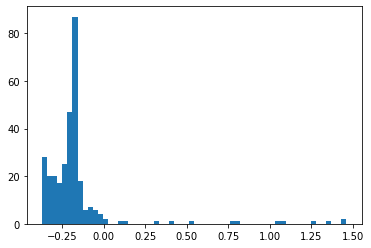

In [18]:
plt.hist(sig1, bins=60)

print(moment(sig1, moment = 3))
print(moment(sig1, moment = 4))
print(moment(sig1, moment = 5))

In [5]:
n_list

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202,
       203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220,
       221, 222, 223, 228, 230, 231, 232, 233, 234])

In [7]:
# n=100

X = []
X_preRR = []; X_postRR = []

Y = []


for n in n_list:
    print(n)    
    signals, fields = wfdb.rdsamp('data/' + str(n))
    annotation = wfdb.rdann('data/' + str(n), 'atr')
    
    if(fields["sig_name"] != ['MLII','V1']):
        continue
        
    labels = annotation.symbol
    length = annotation.ann_len
    locs = annotation.sample # sample locations
    print(fields["sig_name"])
    print(Counter(labels).keys()) 
    print(Counter(labels).values()) 

    
    delta = 150

    for idx,(loc,label) in enumerate(zip(locs,labels)):
        if(loc > 5*delta and loc < fields["sig_len"] - 5*delta):

            # Normal
            if(label in ['N','L','R','e','j']): 
                X.append(signals[loc-delta:loc+delta,:])
                X_preRR.append(locs[idx]-locs[idx-1])
                X_postRR.append(locs[idx+1]-locs[idx])
                Y.append(0)  
            
            # Arrhythmia
            elif(label in ['A','V','J','F','a','E','S']):
                X.append(signals[loc-delta:loc+delta,:])
                X_preRR.append(locs[idx]-locs[idx-1])
                X_postRR.append(locs[idx+1]-locs[idx])
                Y.append(1)

X = np.dstack(X)
X = np.rollaxis(X,-1)
X_preRR = np.array(X_preRR); X_postRR = np.array(X_postRR)
Y = np.array(Y)

100
101
['MLII', 'V1']
dict_keys(['+', 'N', '~', '|', 'Q', 'A'])
dict_values([1, 1860, 4, 4, 2, 3])
102
103
104
105
['MLII', 'V1']
dict_keys(['+', 'N', 'V', '~', '|', 'Q'])
dict_values([1, 2526, 41, 88, 30, 5])
106
['MLII', 'V1']
dict_keys(['~', '+', 'N', 'V'])
dict_values([30, 41, 1507, 520])
107
['MLII', 'V1']
dict_keys(['+', '/', 'V', '~'])
dict_values([1, 2078, 59, 2])
108
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'x', '~', '|', 'F', 'A', 'j'])
dict_values([1, 1739, 17, 11, 41, 8, 2, 4, 1])
109
['MLII', 'V1']
dict_keys(['+', 'L', 'F', 'V', '~'])
dict_values([1, 2492, 2, 38, 2])
111
['MLII', 'V1']
dict_keys(['+', 'L', '~', 'V'])
dict_values([1, 2123, 8, 1])
112
['MLII', 'V1']
dict_keys(['+', 'N', '~', 'A'])
dict_values([1, 2537, 10, 2])
113
['MLII', 'V1']
dict_keys(['+', 'N', 'a'])
dict_values([1, 1789, 6])
114
115
['MLII', 'V1']
dict_keys(['+', 'N', '~', '|'])
dict_values([1, 1953, 2, 6])
116
['MLII', 'V1']
dict_keys(['+', 'N', 'V', 'A', '~'])
dict_values([1, 2302, 109, 1, 8])
117
1

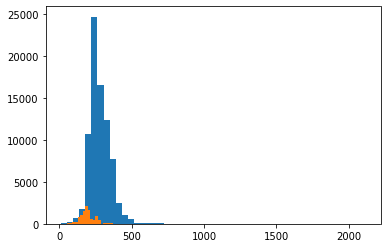

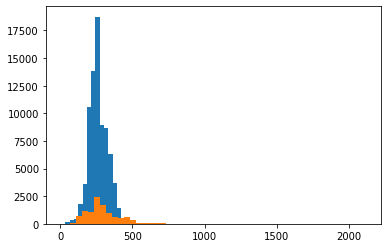

In [45]:
plt.hist(X_preRR[Y==0],bins = 50)
plt.hist(X_preRR[Y==1],bins = 50)
plt.show()

plt.hist(X_postRR[Y==0],bins = 50)
plt.hist(X_postRR[Y==1],bins = 50)
plt.show()

In [8]:
print(X.shape)
print(Y.shape)
print(X_preRR.shape, X_postRR.shape)

print(Counter(Y).keys()) 
print(Counter(Y).values()) 

(90069, 300, 2)
(90069,)
(90069,) (90069,)
dict_keys([0, 1])
dict_values([79459, 10610])


## Feature Extraction

In [11]:
from scipy.stats import moment
from sklearn.mixture import GaussianMixture

In [12]:
def GMM(X):
    gm = GaussianMixture(n_components=2, random_state=0)
    gm.fit(X)
    m = gm.means_ ; w = gm.weights_
    result = [m[0,0],m[0,1],m[1,0],m[1,1],w[0],w[1]]
    return result

In [13]:
def create_feature_vectors(X):
    Xf = []
    
    for i in range(len(X)):
#         if(i%1000==0):
#             print(i)

        gmm_result = GMM(X[i,:,:])
        
        Xf.append([
            X_preRR[i],
            X_postRR[i],
            moment(X[i,:,0], moment = 3),
            moment(X[i,:,0], moment = 4),
            moment(X[i,:,0], moment = 5),
            moment(X[i,:,1], moment = 3),
            moment(X[i,:,1], moment = 4),
            moment(X[i,:,1], moment = 5)]
            + gmm_result
                )
    
    Xf = np.vstack(Xf)
    
    return Xf

In [ ]:
# Xf = create_feature_vectors(X)
# Xf = X[:,:,0]

In [9]:
import pickle

In [10]:
# with open('Xf.pickle', 'wb') as f:
#     pickle.dump(Xf, f)

In [11]:
with open('Xf.pickle', 'rb') as f:
    Xf = pickle.load(f)

In [12]:
print(Xf.shape, Y.shape)
print(Counter(Y).keys()) 
print(Counter(Y).values()) 

(90069, 14) (90069,)
dict_keys([0, 1])
dict_values([79459, 10610])


## Model Training

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Xf, Y, test_size=0.2, random_state=42)
X_sig_train, X_sig_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# standardize
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(Counter(y_train).keys()) 
print(Counter(y_train).values()) 

dict_keys([0, 1])
dict_values([63576, 8479])


### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# param_grid = {'n_neighbors':[2,3,4,5,7,10]}
# base_estimator = KNeighborsClassifier()
# clf = GridSearchCV(base_estimator, param_grid, cv=5, verbose=3)

In [25]:
# clf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....................n_neighbors=2;, score=0.974 total time=   4.3s
[CV 2/5] END .....................n_neighbors=2;, score=0.974 total time=   5.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.971 total time=   4.5s
[CV 4/5] END .....................n_neighbors=2;, score=0.972 total time=   4.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.972 total time=   4.2s
[CV 1/5] END .....................n_neighbors=3;, score=0.975 total time=   4.5s
[CV 2/5] END .....................n_neighbors=3;, score=0.976 total time=   4.9s
[CV 3/5] END .....................n_neighbors=3;, score=0.975 total time=   4.6s
[CV 4/5] END .....................n_neighbors=3;, score=0.974 total time=   4.3s
[CV 5/5] END .....................n_neighbors=3;, score=0.975 total time=   4.6s
[CV 1/5] END .....................n_neighbors=4;, score=0.974 total time=   4.7s
[CV 2/5] END .....................n_neighbors=4;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 7, 10]}, verbose=3)

In [28]:
# pd.DataFrame(clf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.199458      0.007509         4.203733        0.332733   
1       0.193129      0.001758         4.371594        0.198878   
2       0.205529      0.011274         4.776700        0.235222   
3       0.192950      0.001498         4.888422        0.188147   
4       0.209898      0.015590         5.462342        0.282867   
5       0.197629      0.006235         5.868223        0.441492   

  param_n_neighbors               params  split0_test_score  \
0                 2   {'n_neighbors': 2}           0.974192   
1                 3   {'n_neighbors': 3}           0.975438   
2                 4   {'n_neighbors': 4}           0.974054   
3                 5   {'n_neighbors': 5}           0.974677   
4                 7   {'n_neighbors': 7}           0.973500   
5                10  {'n_neighbors': 10}           0.971563   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.973846           0.971494           0.971976           0.972461   
1           0.975645           0.974538           0.973983           0.975090   
2           0.975576           0.974261           0.972530           0.973360   
3           0.975092           0.974469           0.973706           0.973844   
4           0.974054           0.972670           0.971630           0.972184   
5           0.971632           0.971148           0.969624           0.971215   

   mean_test_score  std_test_score  rank_test_score  
0         0.972794        0.001052                5  
1         0.974939        0.000607                1  
2         0.973956        0.001012                3  
3         0.974358        0.000518                2  
4         0.972808        0.000875                4  
5         0.971036        0.000731                6

In [32]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_hat = clf.predict(X_train)
print(confusion_matrix(y_train, y_hat)) # true, pred
print("Accuracy: ",accuracy_score(y_train, y_hat))
print("F1 Score: ",f1_score(y_train, y_hat))

[[62891   685]
 [ 1613  6866]]
Accuracy:  0.968107695510374
F1 Score:  0.8566437928883344


In [34]:
y_hat = clf.predict(X_test)
print(confusion_matrix(y_test, y_hat)) # true, pred
print("Accuracy: ",accuracy_score(y_test, y_hat))
print("F1 Score: ",f1_score(y_test, y_hat))
print(classification_report(y_test, y_hat, digits=4))

[[15514   369]
 [  621  1510]]
Accuracy:  0.9450427445320306
F1 Score:  0.7531172069825437
              precision    recall  f1-score   support

           0     0.9615    0.9768    0.9691     15883
           1     0.8036    0.7086    0.7531      2131

    accuracy                         0.9450     18014
   macro avg     0.8826    0.8427    0.8611     18014
weighted avg     0.9428    0.9450    0.9435     18014



7 0 1


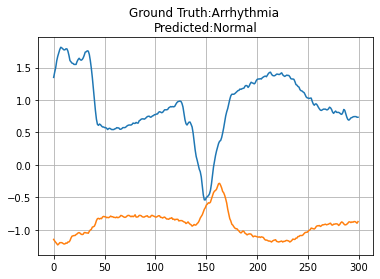

0 0 0


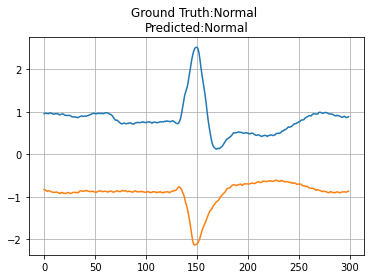

In [41]:
lab = ["Normal","Arrhythmia"]

for n in range(len(y_hat)):
    if(y_hat[n] != y_test[n]):
        print(n, y_hat[n],y_test[n])
        plt.plot(X_sig_test[n,:,0] + 1)
        plt.plot(X_sig_test[n,:,1] - 1)
        plt.title("Ground Truth:" + lab[y_test[n]] +  " \nPredicted:" + lab[y_hat[n]] )
        plt.legend(["MLII","V5"])
        plt.grid()
        plt.show()
        break
        
for n in range(len(y_hat)):
    if(y_hat[n] == y_test[n]):
        print(n, y_hat[n],y_test[n])
        plt.plot(X_sig_test[n,:,0] + 1)
        plt.plot(X_sig_test[n,:,1] - 1)
        plt.title("Ground Truth:" + lab[y_test[n]] +  " \nPredicted:" + lab[y_hat[n]] )
        plt.legend(["MLII","V5"])
        plt.grid()
        plt.show()
        break

### SVM

In [18]:
from sklearn import svm

In [51]:
# param_grid = [
#   {'C': [0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly']},
#   {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1e-3, 1e-4, 1e-5, 1e-6], 'kernel': ['rbf']},
#  ]
# base_estimator = svm.SVC()
# clf = GridSearchCV(base_estimator, param_grid, cv=5, verbose=3)

In [52]:
# clf.fit(X_train,y_train)

In [53]:
# pd.DataFrame(clf.cv_results_)

In [24]:
# Train
clf = svm.SVC(C=10.0, gamma = 1.0, kernel='rbf', degree=3)
clf.fit(X_train,y_train)

SVC(C=10.0, gamma=1.0)

In [25]:
y_hat = clf.predict(X_train)
print(confusion_matrix(y_train, y_hat)) # true, pred
print("Accuracy: ",accuracy_score(y_train, y_hat))
print("F1 Score: ",f1_score(y_train, y_hat))

[[63524    52]
 [  199  8280]]
Accuracy:  0.9965165498577475
F1 Score:  0.9850692998631848


In [26]:
y_hat = clf.predict(X_test)
print(confusion_matrix(y_test, y_hat)) # true, pred
print("Accuracy: ",accuracy_score(y_test, y_hat))
print("F1 Score: ",f1_score(y_test, y_hat))
print(classification_report(y_test, y_hat, digits=4))

[[15770   113]
 [  209  1922]]
Accuracy:  0.9821250138780948
F1 Score:  0.9227076332213153
              precision    recall  f1-score   support

           0     0.9869    0.9929    0.9899     15883
           1     0.9445    0.9019    0.9227      2131

    accuracy                         0.9821     18014
   macro avg     0.9657    0.9474    0.9563     18014
weighted avg     0.9819    0.9821    0.9819     18014



78 0 1


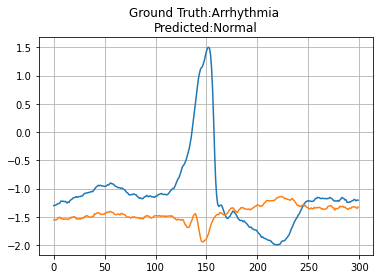

0 0 0


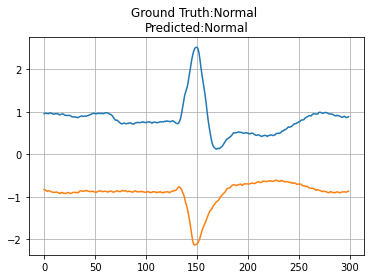

In [27]:
lab = ["Normal","Arrhythmia"]

for n in range(len(y_hat)):
    if(y_hat[n] != y_test[n]):
        print(n, y_hat[n],y_test[n])
        plt.plot(X_sig_test[n,:,0] + 1)
        plt.plot(X_sig_test[n,:,1] - 1)
        plt.title("Ground Truth:" + lab[y_test[n]] +  " \nPredicted:" + lab[y_hat[n]] )
        plt.grid()
        plt.show()
        break
        
for n in range(len(y_hat)):
    if(y_hat[n] == y_test[n]):
        print(n, y_hat[n],y_test[n])
        plt.plot(X_sig_test[n,:,0] + 1)
        plt.plot(X_sig_test[n,:,1] - 1)
        plt.title("Ground Truth:" + lab[y_test[n]] +  " \nPredicted:" + lab[y_hat[n]] )
        plt.grid()
        plt.show()
        break

2 0 0


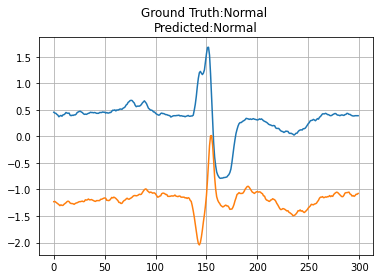

In [28]:
n=2
print(n, y_hat[n],y_test[n])
plt.plot(X_sig_test[n,:,0] + 1)
plt.plot(X_sig_test[n,:,1] - 1)
plt.title("Ground Truth:" + lab[y_test[n]] +  " \nPredicted:" + lab[y_hat[n]] )
plt.grid()
plt.show()

### Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
# param_grid = {'n_estimators':[10,25,50,100,200,500]}
# base_estimator = BaggingClassifier()
# clf = GridSearchCV(base_estimator, param_grid, cv=5, verbose=3)

In [31]:
# clf.fit(X_train,y_train)

In [41]:
# pd.DataFrame(clf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.843329      0.379397         0.040590        0.000727   
1      42.048882      0.883954         0.105269        0.006111   
2      80.651473      1.694107         0.210115        0.013109   
3     166.138255      9.725477         0.436315        0.049684   
4     308.820746      3.093387         0.758808        0.001794   
5     768.405539      8.635355         1.879228        0.009238   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}           0.976060   
1                 25   {'n_estimators': 25}           0.978413   
2                 50   {'n_estimators': 50}           0.979105   
3                100  {'n_estimators': 100}           0.978690   
4                200  {'n_estimators': 200}           0.979451   
5                500  {'n_estimators': 500}           0.979658   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.977721           0.976475           0.975574           0.976751   
1           0.978759           0.979174           0.976889           0.977166   
2           0.979658           0.978759           0.976958           0.979380   
3           0.979105           0.979381           0.977719           0.978965   
4           0.980004           0.979451           0.977373           0.980141   
5           0.979658           0.979035           0.977581           0.979588   

   mean_test_score  std_test_score  rank_test_score  
0         0.976516        0.000722                6  
1         0.978080        0.000897                5  
2         0.978772        0.000955                4  
3         0.978772        0.000572                3  
4         0.979284        0.000996                1  
5         0.979104        0.000797                2

In [32]:
# Train
num_trees = 100
clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = num_trees, random_state = 42)
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [33]:
y_hat = clf.predict(X_train)
print(confusion_matrix(y_train, y_hat)) # true, pred
print("Accuracy: ",accuracy_score(y_train, y_hat))
print("F1 Score: ",f1_score(y_train, y_hat))

[[63576     0]
 [    1  8478]]
Accuracy:  0.9999861217125807
F1 Score:  0.999941027304358


In [34]:
y_hat = clf.predict(X_test)
print(confusion_matrix(y_test, y_hat)) # true, pred
print("Accuracy: ",accuracy_score(y_test, y_hat))
print("F1 Score: ",f1_score(y_test, y_hat))
print(classification_report(y_test, y_hat, digits=4))

[[15776   107]
 [  180  1951]]
Accuracy:  0.9840679471522149
F1 Score:  0.9314872284554786
              precision    recall  f1-score   support

           0     0.9887    0.9933    0.9910     15883
           1     0.9480    0.9155    0.9315      2131

    accuracy                         0.9841     18014
   macro avg     0.9684    0.9544    0.9612     18014
weighted avg     0.9839    0.9841    0.9839     18014



132 0 1


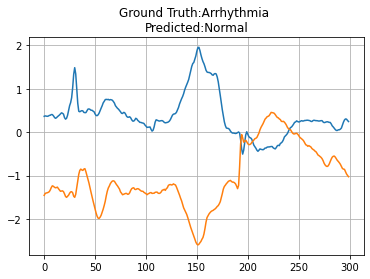

0 0 0


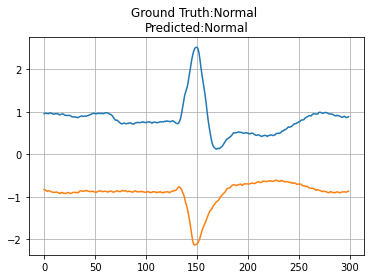

In [35]:
lab = ["Normal","Arrhythmia"]

for n in range(len(y_hat)):
    if(y_hat[n] != y_test[n]):
        print(n, y_hat[n],y_test[n])
        plt.plot(X_sig_test[n,:,0] + 1)
        plt.plot(X_sig_test[n,:,1] - 1)
        plt.title("Ground Truth:" + lab[y_test[n]] +  " \nPredicted:" + lab[y_hat[n]] )
        plt.grid()
        plt.show()
        break
        
for n in range(len(y_hat)):
    if(y_hat[n] == y_test[n]):
        print(n, y_hat[n],y_test[n])
        plt.plot(X_sig_test[n,:,0] + 1)
        plt.plot(X_sig_test[n,:,1] - 1)
        plt.title("Ground Truth:" + lab[y_test[n]] +  " \nPredicted:" + lab[y_hat[n]] )
        plt.grid()
        plt.show()
        break

3 1 1


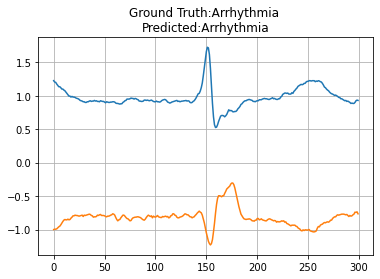

In [36]:
n=3
print(n, y_hat[n],y_test[n])
plt.plot(X_sig_test[n,:,0] + 1)
plt.plot(X_sig_test[n,:,1] - 1)
plt.title("Ground Truth:" + lab[y_test[n]] +  " \nPredicted:" + lab[y_hat[n]] )
plt.grid()
plt.show()